# Big Data Task 2
<b>Authors</b>
<ul>
    <li>Piotr Janiszek</li>
    <li>Mateusz Dominiak</li>
<ul>

<h1>1. Charts & Analysis</h1>

Imports

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from adjustText import adjust_text
from matplotlib.colors import LogNorm
import geopandas as gpd
import io
import requests
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
from matplotlib.lines import Line2D


Data Loading

In [22]:
df = pd.read_csv('data/combined.csv')
df.head()
print(df.columns)

cols = [
    'new_confirmed',
    'new_deceased',
    'new_vaccine_doses_administered',
    'cumulative_confirmed',
    'cumulative_deceased',
    'cumulative_vaccine_doses_administered'
]

group_sum = df.groupby('iso_3166_1_alpha_3')[cols].sum()

print(len(df))

# Wybieramy te państwa, dla których we wszystkich kolumnach suma jest równa zero
countries_to_remove = group_sum[(group_sum == 0).all(axis=1)].index

# Usuwamy wiersze odpowiadające krajom, które spełniają warunek
df = df[~df['iso_3166_1_alpha_3'].isin(countries_to_remove)]
df['Continent'] = df['Continent'].replace('0', 'Unknown')

print(len(df))


Index(['location_key', 'date', 'iso_3166_1_alpha_3', 'country_name',
       'new_confirmed', 'cumulative_confirmed', 'new_tested',
       'cumulative_tested', 'new_deceased', 'cumulative_deceased',
       'new_persons_vaccinated', 'cumulative_persons_vaccinated',
       'new_persons_fully_vaccinated', 'cumulative_persons_fully_vaccinated',
       'new_vaccine_doses_administered',
       'cumulative_vaccine_doses_administered', 'smoking_prevalence',
       'diabetes_prevalence', 'hospital_beds_per_1000', 'nurses_per_1000',
       'physicians_per_1000', 'health_expenditure_usd', 'population_urban',
       'population_age_80_and_older', 'population_clustered',
       'stringency_index', 'emergency_investment_in_healthcare',
       'investment_in_vaccines', 'fiscal_measures', 'income_support', 'GDP',
       'Population', 'Rank', 'Capital', 'Continent', 'Area (km²)',
       'Density (per km²)', 'Growth Rate', 'World Population Percentage',
       'Unemployment, total (% of total labor force

1.1. the number of new cases

In [ ]:
# Z podziałem na kontynenty
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Continent',
    y='new_confirmed',
    data=df,
    hue='Continent',
    palette='Set2',
    legend=False
)
plt.title("Liczba nowych zachorowań wg kontynentu")
plt.ylabel('Liczba nowych zachorowań (skala log)')
plt.yscale('log')
plt.show()


1.2. the number of new deaths

In [ ]:
# Z podziałem na kontynenty
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Continent',
    y='new_deceased',
    data=df,
    hue='Continent',
    palette='Set2',
    legend=False
)
plt.title("Liczby nowych śmierci wg kontynentu")
plt.ylabel('Liczba zgonów (skala log)')
plt.yscale('log')
plt.show()


1.3. the number of new vaccinations

In [ ]:
# Z podziałem na kontynenty
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Continent',
    y='new_vaccine_doses_administered',
    data=df,
    hue='Continent',
    palette='Set2',
    legend=False
)
plt.title('Rozkład dziennych dawek szczepionek wg kontynentu')
plt.ylabel('Liczba dawek (skala log)')
plt.yscale('log')
plt.show()


1.4. population

In [ ]:
# Z podziałem na kontynenty
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Continent',
    y='Population',
    data=df[df['Continent'] != 'Unknown'],
    hue='Continent',
    palette='Set2',
    legend=False
)
plt.title('Rozkład populacji krajów wg kontynentu')
plt.ylabel('Populacja (skala log)')
plt.yscale('log')
plt.show()


1.5 GDP

In [ ]:
# Z podziałem na kontynenty
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Continent',
    y='GDP',
    data=df,
    hue='Continent',
    palette='Set2',
    legend=False
)
plt.title('Rozkład PKB krajów wg kontynentu')
plt.ylabel('PKB (skala log)')
plt.yscale('log')
plt.show()


1.6.1 Availability of hospital beds per 1000 inhabitants

In [ ]:
# Z podziałem na kontynenty
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Continent',
    y='hospital_beds_per_1000',
    data=df[df['Continent'] != 'Unknown'],
    hue='Continent',
    palette='Set2',
    legend=False
)
plt.title('Dostępność łóżek szpitalnych na 1000 mieszkańców')
plt.ylabel('Łóżka szpitalne/1000')
# plt.yscale('log')
plt.show()


1.6.2 Suicide rate per 100 000 inhabitants

In [ ]:
# Z podziałem na kontynenty
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Continent',
    y='SuicideRate_BothSexes_RatePer100k',
    data=df,
    hue='Continent',
    palette='Set2',
    legend=False
)
plt.title('Wskaźnik samobójstw na 100 tys. mieszkańców')
plt.ylabel('Liczba samobójstw/100k (skala log)')
plt.yscale('log')
plt.show()


1.6.3 Average earnings by continent

In [ ]:
# Z podziałem na kontynenty
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Continent',
    y='average_salary',
    data=df,
    hue='Continent',
    palette='Set2',
    legend=False
)
plt.title("Średnie zarobki wg kontynentu ")
plt.ylabel('Pensja USD')
# plt.yscale('log')
plt.show()


1.6.4 Total unemployment (% of total workforce) by continent

In [ ]:
# Z podziałem na kontynenty
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Continent',
    y='Unemployment, total (% of total labor force)',
    data=df[df['Continent'] != 'Unknown'],
    hue='Continent',
    palette='Set2',
    legend=False
)
plt.title('Bezrobocie całkowite (% całej siły roboczej) wg kontynentu')
plt.ylabel('Bezrobocie (%)')
# plt.yscale('log')
plt.show()


<h1>2. Outliers</h1>

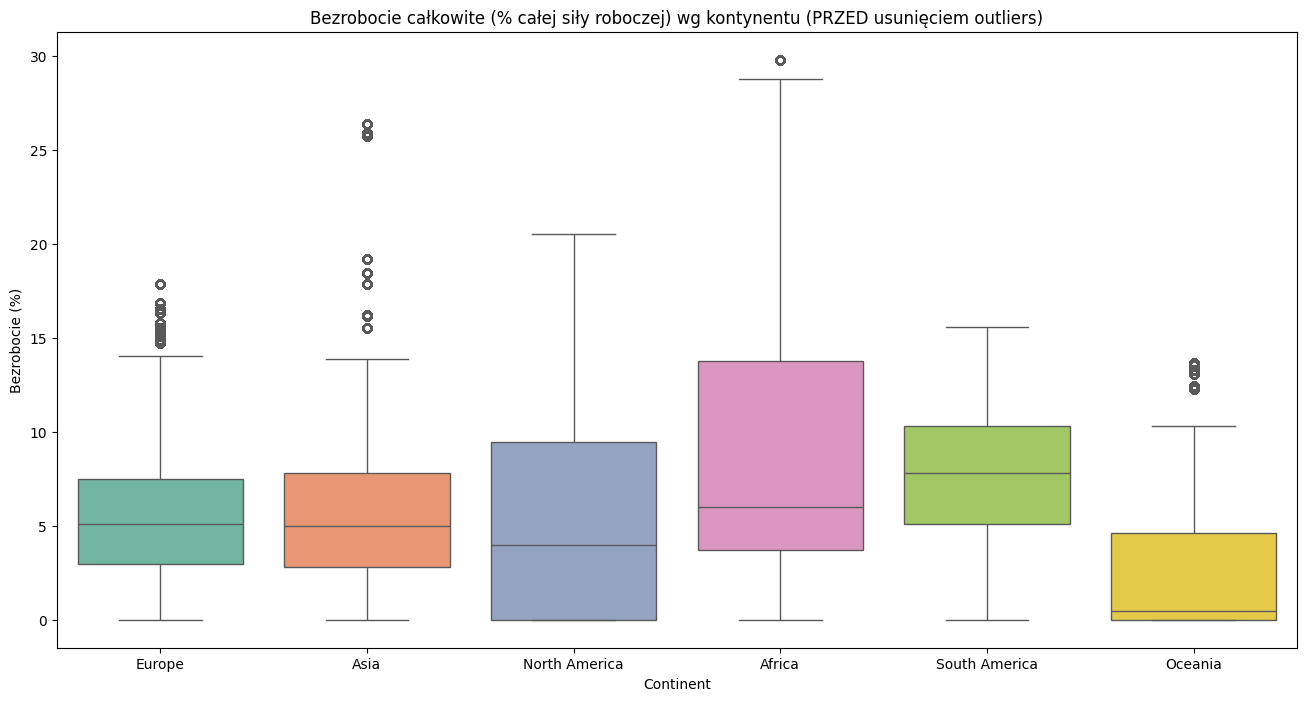

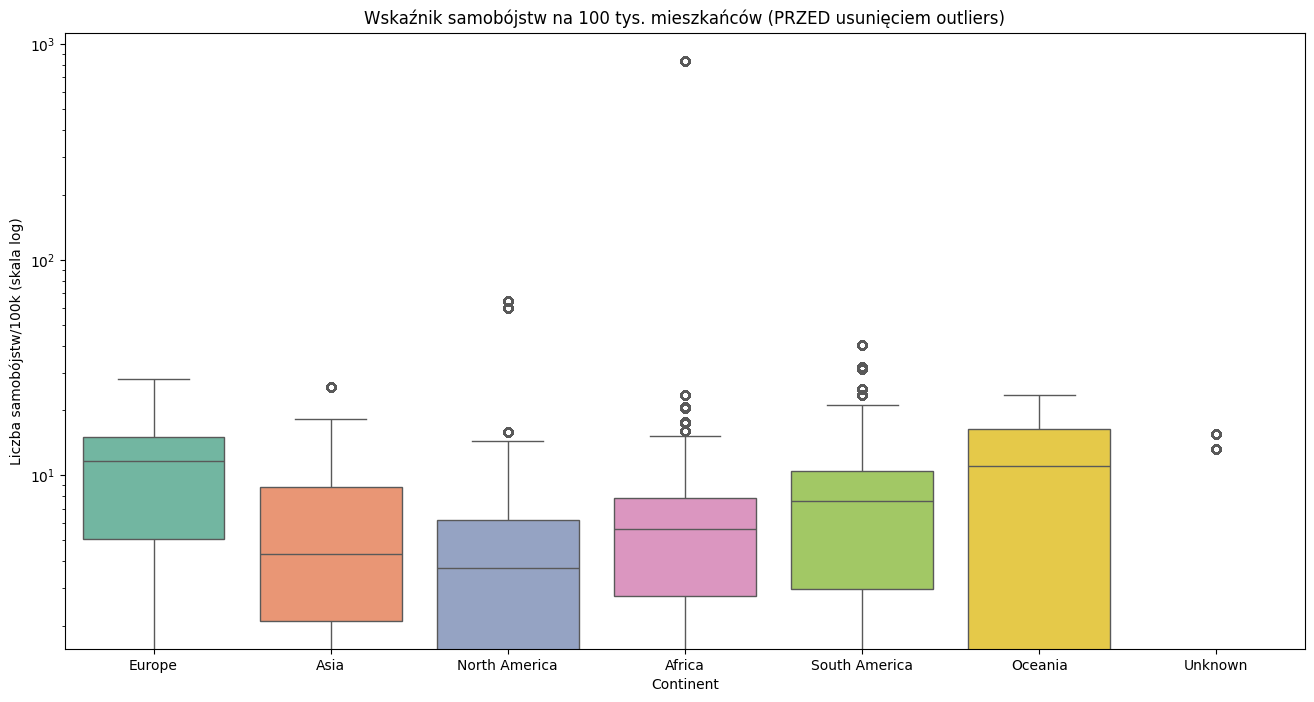


STATYSTYKI Unemployment:
Przed: Min=0, Max=30
STATYSTYKI Wskaźnik samobójstw:
Przed: Min=0, Max=837


In [23]:
# Wykres dla Unemployment, total (% of total labor force) (przed zmianami)
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Continent',
    y='Unemployment, total (% of total labor force)',
    data=df[df['Continent'] != 'Unknown'],
    hue='Continent',
    palette='Set2',
    legend=False
)
plt.title('Bezrobocie całkowite (% całej siły roboczej) wg kontynentu (PRZED usunięciem outliers)')
plt.ylabel('Bezrobocie (%)')
# plt.yscale('log')
plt.show()

# Wykres dla SuicideRate_BothSexes_RatePer100k (przed zmianami)
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Continent',
    y='SuicideRate_BothSexes_RatePer100k',
    data=df,
    hue='Continent',
    palette='Set2',
    legend=False
)
plt.title('Wskaźnik samobójstw na 100 tys. mieszkańców (PRZED usunięciem outliers)')
plt.ylabel('Liczba samobójstw/100k (skala log)')
plt.yscale('log')
plt.show()

print("\nSTATYSTYKI Unemployment:")
print(f"Przed: Min={df['Unemployment, total (% of total labor force)'].min():.0f}, Max={df['Unemployment, total (% of total labor force)'].max():.0f}")
print("STATYSTYKI Wskaźnik samobójstw:")
print(f"Przed: Min={df['SuicideRate_BothSexes_RatePer100k'].min():.0f}, Max={df['SuicideRate_BothSexes_RatePer100k'].max():.0f}")


In [24]:
# Usuwanie wartości odstających metodą IQR dla Unemployment, total (% of total labor force)
# Obliczamy kwartyle oraz IQR
Q1 = df['Unemployment, total (% of total labor force)'].quantile(0.25)
Q3 = df['Unemployment, total (% of total labor force)'].quantile(0.75)
IQR = Q3 - Q1
# Wyznaczamy dolną i górną granicę
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# print(f"Lower bound: {lower_bound}"
#       f"\nUpper bound: {upper_bound}")
# Obliczamy medianę dla kolumny 'Unemployment, total (% of total labor force)'
median_value = df['Unemployment, total (% of total labor force)'].median()

# Tworzymy maskę identyfikującą wartości odstające
mask_outliers = (df['Unemployment, total (% of total labor force)'] < lower_bound) | (df['Unemployment, total (% of total labor force)'] > upper_bound)

# Zastępujemy wartości odstające medianą
df.loc[mask_outliers, 'Unemployment, total (% of total labor force)'] = median_value

print(f"Liczba wierszy po zastąpieniu wartości odstających: {len(df)}")


Liczba wierszy po zastąpieniu wartości odstających: 229912


In [25]:
# Usuwanie wartości odstających metodą Z-score dla SuicideRate_BothSexes_RatePer100k
# Obliczamy Z-score dla kolumny 'SuicideRate_BothSexes_RatePer100k'
z_scores = stats.zscore(df['SuicideRate_BothSexes_RatePer100k'])

# Określamy próg, np. 3 (warto go dostosować do konkretnego przypadku)
threshold = 3
# Maskujemy wartości odstające (outliery)
mask_outliers = np.abs(z_scores) >= threshold

# Obliczamy medianę dla kolumny 'SuicideRate_BothSexes_RatePer100k'
median_value = df['SuicideRate_BothSexes_RatePer100k'].median()
# Zastępujemy wartości odstające medianą
df.loc[mask_outliers, 'SuicideRate_BothSexes_RatePer100k'] = median_value



Plik 'combined.csv' został zaktualizowany.


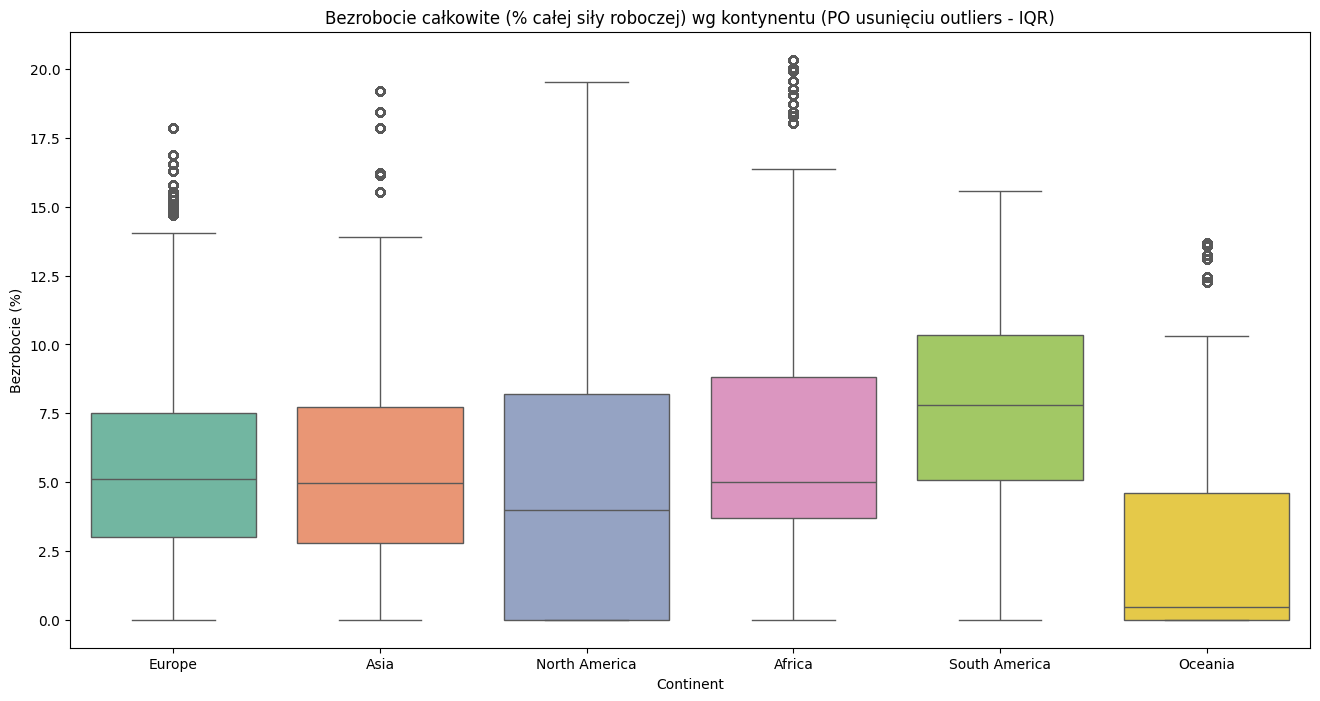

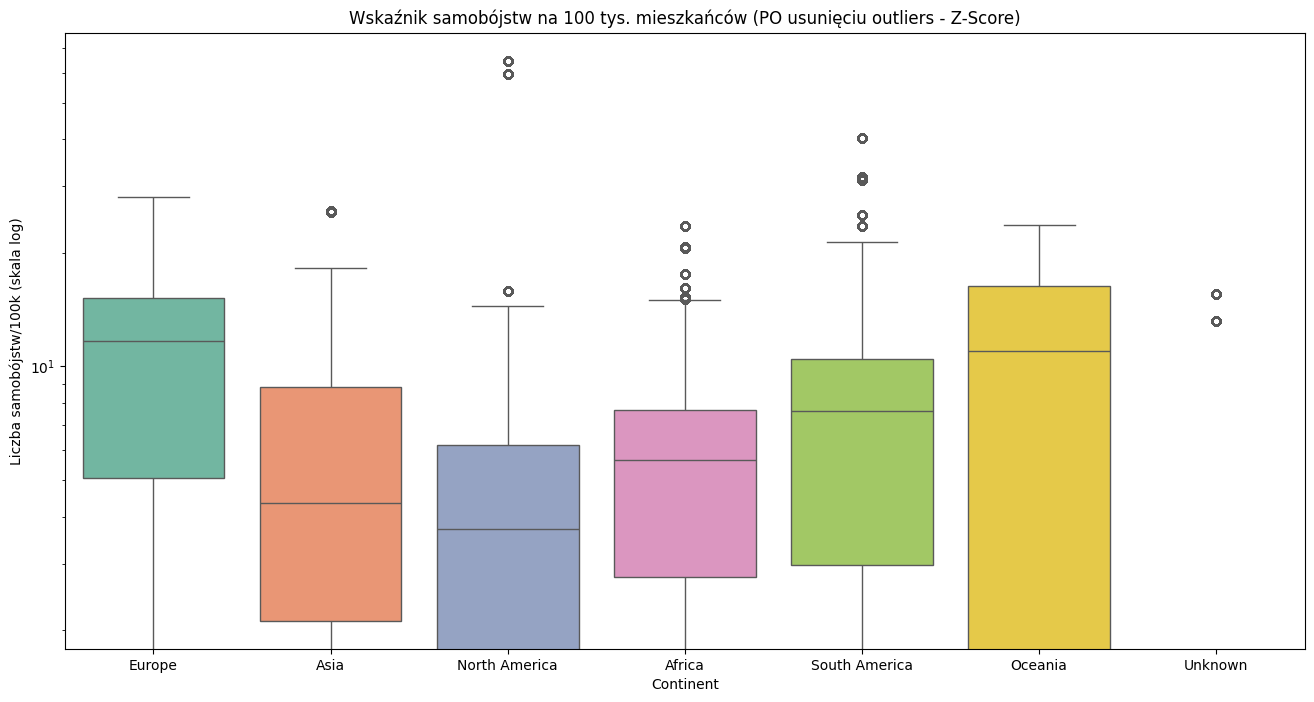


STATYSTYKI Unemployment:
Po: Min=0, Max=20
STATYSTYKI Wskaźnik samobójstw:
Po: Min=0, Max=65


In [26]:
# Zapisanie zmodyfikowanych danych
df.to_csv('data/combined.csv', index=False)
print("\nPlik 'combined.csv' został zaktualizowany.")

# Wykres dla populacji (po zmianach)
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Continent',
    y='Unemployment, total (% of total labor force)',
    data=df[df['Continent'] != 'Unknown'],
    hue='Continent',
    palette='Set2',
    legend=False
)
plt.title('Bezrobocie całkowite (% całej siły roboczej) wg kontynentu (PO usunięciu outliers - IQR)')
plt.ylabel('Bezrobocie (%)')
# plt.yscale('log')
plt.show()


# Wykres dla PKB (po zmianach)
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Continent',
    y='SuicideRate_BothSexes_RatePer100k',
    data=df,
    hue='Continent',
    palette='Set2',
    legend=False
)
plt.title('Wskaźnik samobójstw na 100 tys. mieszkańców (PO usunięciu outliers - Z-Score)')
plt.ylabel('Liczba samobójstw/100k (skala log)')
plt.yscale('log')
plt.show()

# Statystyki po
print("\nSTATYSTYKI Unemployment:")
print(f"Po: Min={df['Unemployment, total (% of total labor force)'].min():.0f}, Max={df['Unemployment, total (% of total labor force)'].max():.0f}")
print("STATYSTYKI Wskaźnik samobójstw:")
print(f"Po: Min={df['SuicideRate_BothSexes_RatePer100k'].min():.0f}, Max={df['SuicideRate_BothSexes_RatePer100k'].max():.0f}")


<h1>3. Statistical calculations</h1>

3.1. the average number of new illnesses, deaths and vaccinations for at least 10 selected countries in a selected month

In [ ]:
df['date'] = pd.to_datetime(df['date'])

# Filtering data for April 2021 (from April 1 to April 30)
df_april = df[(df['date'] >= '2021-04-01') & (df['date'] <= '2021-04-30')]

# Count the average for the columns of new cases, deaths and vaccinations
aggregations = {
    'new_confirmed': 'mean',
    'new_deceased': 'mean',
    'new_vaccine_doses_administered': ['mean', 'sum'],
    'Continent': 'first'
}

# Data grouping for April 2021
group_april = df_april.groupby('iso_3166_1_alpha_3').agg(aggregations).reset_index()

pd.set_option('display.max_rows', None)

# Average values for April 2021
display(group_april)

# Average values for the entire time interval
group_total = df.groupby('iso_3166_1_alpha_3').agg(aggregations).reset_index()

display(group_total)


In [ ]:
df['date'] = pd.to_datetime(df['date'])
print(df['Continent'].unique())
avg_population_by_country = df.groupby('iso_3166_1_alpha_3', as_index=False).agg({
    'Continent': 'first',
    'Population': 'mean'
})
pop_by_continent = avg_population_by_country.groupby('Continent')['Population'].sum().reset_index()

# --- Wykres 1: Wykres słupkowy - suma nowych przypadków według kontynentów ---

# Grupujemy dane według kontynentu
continent_totals = df.groupby('Continent')['new_confirmed'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=continent_totals, x='Continent', y='new_confirmed', palette='viridis')
plt.title('Łączna liczba nowych przypadków według kontynentów')
plt.xlabel('Kontynent')
plt.ylabel('Suma nowych przypadków')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Grupujemy dane według kontynentu
continent_totals = df.groupby('Continent')['new_deceased'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=continent_totals, x='Continent', y='new_deceased', palette='viridis')
plt.title('Łączna liczba nowych śmierci według kontynentów')
plt.xlabel('Kontynent')
plt.ylabel('Suma śmierci')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Grupujemy dane według kontynentu
continent_totals = df.groupby('Continent')['new_persons_fully_vaccinated'].sum().reset_index()
# continent_totals['new_persons_fully_vaccinated'] = continent_totals['new_persons_fully_vaccinated']

fig, ax1 = plt.subplots(figsize=(10, 10))



sns.barplot(data=pop_by_continent, x='Continent', y='Population', color='#EFAE3E', alpha=0.3, ax=ax1)
ax1.set_ylabel('')
ax1.grid(False)

ax2 = ax1.twinx()
sns.barplot(data=continent_totals, x='Continent', y='new_persons_fully_vaccinated', palette='viridis', zorder=1, ax=ax2)
ax2.set_ylabel('Suma osób')

y_max = max(pop_by_continent['Population'].max(), continent_totals['new_persons_fully_vaccinated'].max())

ax1.set_ylim(0, y_max)
ax2.set_ylim(0, y_max)


plt.title('Łączna liczba osób w pełni zaszczepionych według kontynentów')
plt.xlabel('Kontynent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:

# --- Wykres 2: Wykres pudełkowy - rozkład nowych przypadków dla poszczególnych kontynentów ---
#
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=df, x='Continent', y='new_confirmed', palette='Set2')
# plt.yscale('log')  # Użycie skali logarytmicznej
# plt.title('Rozkład nowych przypadków według kontynentów (skala logarytmiczna)')
# plt.xlabel('Kontynent')
# plt.ylabel('Nowe przypadki (logarytmiczna skala)')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
#
#
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=df, x='Continent', y='new_deceased', palette='Set2')
# plt.yscale('log')  # Użycie skali logarytmicznej
# plt.title('Rozkład nowych przypadków według kontynentów (skala logarytmiczna)')
# plt.xlabel('Kontynent')
# plt.ylabel('Nowe przypadki (logarytmiczna skala)')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
#
#
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=df, x='Continent', y='new_vaccine_doses_administered', palette='Set2')
# plt.yscale('log')  # Użycie skali logarytmicznej
# plt.title('Rozkład nowych przypadków według kontynentów (skala logarytmiczna)')
# plt.xlabel('Kontynent')
# plt.ylabel('Nowe przypadki (logarytmiczna skala)')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# Spłaszczamy kolumny przyjmując, że mogą pojawić się krotki
group_april_box = group_april.copy()
group_total_box = group_total.copy()
group_april_box.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col
                       for col in group_april.columns.values]
group_total_box.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col
                       for col in group_total.columns.values]

# Definicja miar do wykresów (klucz: nazwa kolumny, wartość: etykieta)
metrics = [
    ('new_confirmed_mean', 'Nowe przypadki potwierdzone (średnia)'),
    ('new_deceased_mean', 'Nowe zgony (średnia)'),
    ('new_vaccine_doses_administered_mean', 'Dawki szczepionek (średnia)'),
    ('new_vaccine_doses_administered_sum', 'Dawki szczepionek (suma)')
]

sns.set(style="whitegrid")

# Utworzenie siatki 4x2 subwykresów
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
fig.suptitle('Porównanie danych: Kwiecień 2021 vs. Całkowity okres', fontsize=16)

for row, (metric, metric_title) in enumerate(metrics):
    # Wykres dla kwietnia (group_april)
    ax_left = axes[row, 0]
    sns.boxplot(
        data=group_april_box,
        x='Continent_first',  # Zmienione z 'Continent' na 'Continent_first'
        y=metric,
        palette='Set2',
        ax=ax_left
    )
    ax_left.set_yscale('log')
    ax_left.set_title(f"Kwiecień 2021 - {metric_title}")
    ax_left.set_xlabel('Kontynent')
    ax_left.set_ylabel(metric_title)
    ax_left.tick_params(axis='x', rotation=45)

    # Wykres dla całego okresu (group_total)
    ax_right = axes[row, 1]
    sns.boxplot(
        data=group_total_box,
        x='Continent_first',  # Zmienione z 'Continent' na 'Continent_first'
        y=metric,
        palette='Set2',
        ax=ax_right
    )
    ax_right.set_yscale('log')
    ax_right.set_title(f"Całkowity okres - {metric_title}")
    ax_right.set_xlabel('Kontynent')
    ax_right.set_ylabel(metric_title)
    ax_right.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()







# Obliczamy średnie wartości z kwietnia 2021
mean_april_confirmed = group_april['new_confirmed']['mean'].mean()
mean_april_deceased = group_april['new_deceased']['mean'].mean()
mean_april_vacc = group_april['new_vaccine_doses_administered']['mean'].mean()

# Obliczamy średnie wartości z całego okresu
mean_total_confirmed = group_total['new_confirmed']['mean'].mean()
mean_total_deceased = group_total['new_deceased']['mean'].mean()
mean_total_vacc = group_total['new_vaccine_doses_administered']['mean'].mean()

# Przygotowujemy dane do wykresów
labels = ['Kwiecień 2021', 'Cały okres']

data_confirmed = [mean_april_confirmed, mean_total_confirmed]
data_deceased = [mean_april_deceased, mean_total_deceased]
data_vacc = [mean_april_vacc, mean_total_vacc]

# Tworzymy trzy osobne wykresy (każdy z dwiema kolumnami)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1) Nowe przypadki
axes[0].bar(labels, data_confirmed, color=['#fc8d62', '#66c2a5'])
axes[0].set_title('Średnie nowe przypadki')
axes[0].set_ylabel('Liczba przypadków')

# 2) Nowe zgony
axes[1].bar(labels, data_deceased, color=['#fc8d62', '#66c2a5'])
axes[1].set_title('Średnie nowe zgony')
axes[1].set_ylabel('Liczba zgonów')

# 3) Nowe szczepienia
axes[2].bar(labels, data_vacc, color=['#66c2a5', '#fc8d62'])
axes[2].set_title('Średnie nowe szczepienia')
axes[2].set_ylabel('Liczba szczepień')

plt.tight_layout()
plt.show()



In [ ]:
def flatten_columns(columns):
    new_columns = []
    for col in columns:
        if isinstance(col, tuple):
            if col[1] == 'mean':
                new_columns.append(col[0])
            else:
                new_columns.append(f"{col[0]}_{col[1]}")
        else:
            new_columns.append(col)
    return new_columns

group_april.columns = flatten_columns(group_april.columns)
group_total.columns = flatten_columns(group_total.columns)

group_april['Okres'] = 'Kwiecień 2021'
group_total['Okres'] = 'Cały okres'
df_combined = pd.concat([group_april, group_total], ignore_index=True)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(
    data=df_combined,
    x='Okres',
    y='new_confirmed',
    ax=axes[0],
    palette='Set2'
)
axes[0].set_title("Rozkład średnich nowych przypadków")
axes[0].set_ylabel("Nowe przypadki (skala log)")
axes[0].set_yscale('log')

sns.boxplot(
    data=df_combined,
    x='Okres',
    y='new_deceased',
    ax=axes[1],
    palette='Set2'
)
axes[1].set_title("Rozkład średnich nowych zgonów")
axes[1].set_ylabel("Nowe zgony (skala log)")
axes[1].set_yscale('log')

sns.boxplot(
    data=df_combined,
    x='Okres',
    y='new_vaccine_doses_administered',
    ax=axes[2],
    palette='Set2'
)
axes[2].set_title("Rozkład średnich nowych szczepień")
axes[2].set_ylabel("Nowe szczepienia (skala log)")
axes[2].set_yscale('log')

plt.tight_layout()
plt.show()

group_total.drop('Okres', inplace=True, axis=1)
group_april.drop('Okres', inplace=True, axis=1)


In [ ]:

# --- Wykres 3: Wykres liniowy - średnia liczba nowych przypadków na przestrzeni czasu wg kontynentu ---

time_trend = df.groupby(['date', 'Continent'])['new_confirmed'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=time_trend, x='date', y='new_confirmed', hue='Continent', palette='tab10')
plt.title('Liczba nowych przypadków na przestrzeni czasu według kontynentu')
plt.xlabel('Data')
plt.ylabel('Średnia liczba nowych przypadków')
plt.legend(title='Kontynent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


time_trend = df.groupby(['date', 'Continent'])['new_deceased'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=time_trend, x='date', y='new_deceased', hue='Continent', palette='tab10')
plt.title('Liczba nowych śmierci na przestrzeni czasu według kontynentu')
plt.xlabel('Data')
plt.ylabel('Średnia liczba nowych przypadków')
plt.legend(title='Kontynent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



time_trend = df.groupby(['date', 'Continent'])['new_vaccine_doses_administered'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=time_trend, x='date', y='new_vaccine_doses_administered', hue='Continent', palette='tab10')
plt.title('Liczba nowych szczepień na przestrzeni czasu według kontynentu')
plt.xlabel('Data')
plt.ylabel('Średnia liczba nowych przypadków')
plt.legend(title='Kontynent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df_max = df.groupby('iso_3166_1_alpha_3').agg({
    'new_confirmed': 'sum',
    'Continent': 'first'
}).reset_index()

# Ustawienia wykresu
plt.figure(figsize=(30, 16))
scatter_ax = sns.scatterplot(data=df_max, x='iso_3166_1_alpha_3', y='new_confirmed',
                             hue='Continent', palette='Set1', s=100)

plt.title('Maksymalne wartości nowych zachorowań dla każdego państwa')
plt.xlabel('Państwo (kod ISO)')
plt.ylabel('Maksymalna liczba nowych zachorowań')
plt.xticks(rotation=45)

texts = []
for idx, row in df_max.iterrows():
    texts.append(plt.text(row['iso_3166_1_alpha_3'], row['new_confirmed'], row['iso_3166_1_alpha_3'],
                          fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='#EBB7EF'))

scatter_ax.set_xticklabels([])


plt.tight_layout()
plt.show()



df_max = df.groupby('iso_3166_1_alpha_3').agg({
    'new_deceased': 'sum',
    'Continent': 'first'
}).reset_index()

# Ustawienia wykresu
plt.figure(figsize=(30, 16))
scatter_ax = sns.scatterplot(data=df_max, x='iso_3166_1_alpha_3', y='new_deceased',
                             hue='Continent', palette='Set1', s=100)

plt.title('Wartości nowych śmierci dla każdego państwa')
plt.xlabel('Państwo (kod ISO)')
plt.ylabel('Liczba nowych śmierci')
plt.xticks(rotation=45)

texts = []
for idx, row in df_max.iterrows():
    texts.append(plt.text(row['iso_3166_1_alpha_3'], row['new_deceased'], row['iso_3166_1_alpha_3'],
                          fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='#EBB7EF'))

scatter_ax.set_xticklabels([])


plt.tight_layout()
plt.show()



df_max = df.groupby('iso_3166_1_alpha_3').agg({
    'new_vaccine_doses_administered': 'max',
    'Continent': 'first'
}).reset_index()

# Ustawienia wykresu
plt.figure(figsize=(30, 16))
scatter_ax = sns.scatterplot(data=df_max, x='iso_3166_1_alpha_3', y='new_vaccine_doses_administered',
                             hue='Continent', palette='Set1', s=100)

plt.title('Wartości nowych szczepień dla każdego państwa')
plt.xlabel('Państwo (kod ISO)')
plt.ylabel('Liczba nowych szczepień')
plt.xticks(rotation=45)

texts = []
for idx, row in df_max.iterrows():
    texts.append(plt.text(row['iso_3166_1_alpha_3'], row['new_vaccine_doses_administered'], row['iso_3166_1_alpha_3'],
                          fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='#EBB7EF'))

scatter_ax.set_xticklabels([])


plt.tight_layout()
plt.show()


In [ ]:
# spłaszczenie indeksu kolumn (MultiIndex)
group_april.columns = ['iso_3166_1_alpha_3',
                       'new_confirmed_mean',
                       'new_deceased_mean',
                       'new_vaccine_doses_administered_mean',
                       'new_vaccine_doses_administered_sum',
                       'Continent']

plt.figure(figsize=(30, 16))
scatter_ax = sns.scatterplot(data=group_april,
                             x='iso_3166_1_alpha_3',
                             y='new_confirmed_mean',
                             hue='Continent',
                             palette='Set1',
                             s=100)

plt.title('Średnia liczba nowych zachorowań w kwietniu 2021 dla każdego państwa')
plt.xlabel('Państwo (kod ISO)')
plt.ylabel('Średnia liczba nowych zachorowań')
plt.xticks(rotation=45)

# Dodawanie etykiet dla punktów
texts = []
for idx, row in group_april.iterrows():
    texts.append(plt.text(row['iso_3166_1_alpha_3'], row['new_confirmed_mean'], row['iso_3166_1_alpha_3'], fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='#EBB7EF'))

scatter_ax.set_xticklabels([])

plt.tight_layout()
plt.show()



plt.figure(figsize=(30, 16))
scatter_ax = sns.scatterplot(data=group_april,
                             x='iso_3166_1_alpha_3',
                             y='new_deceased_mean',
                             hue='Continent',
                             palette='Set1',
                             s=100)

plt.title('Średnia liczba nowych śmierci w kwietniu 2021 dla każdego państwa')
plt.xlabel('Państwo (kod ISO)')
plt.ylabel('Średnia liczba nowych śmierci')
plt.xticks(rotation=45)

# Dodawanie etykiet dla punktów
texts = []
for idx, row in group_april.iterrows():
    texts.append(plt.text(row['iso_3166_1_alpha_3'], row['new_deceased_mean'], row['iso_3166_1_alpha_3'], fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='#EBB7EF'))

scatter_ax.set_xticklabels([])

plt.tight_layout()
plt.show()



plt.figure(figsize=(30, 16))
scatter_ax = sns.scatterplot(data=group_april,
                             x='iso_3166_1_alpha_3',
                             y='new_vaccine_doses_administered_mean',
                             hue='Continent',
                             palette='Set1',
                             s=100)

plt.title('Średnia liczba nowych szczepień w kwietniu 2021 dla każdego państwa')
plt.xlabel('Państwo (kod ISO)')
plt.ylabel('Średnia liczba nowych szczepień')
plt.xticks(rotation=45)

# Dodawanie etykiet dla punktów
texts = []
for idx, row in group_april.iterrows():
    texts.append(plt.text(row['iso_3166_1_alpha_3'], row['new_vaccine_doses_administered_mean'], row['iso_3166_1_alpha_3'], fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='#EBB7EF'))

scatter_ax.set_xticklabels([])

plt.tight_layout()
plt.show()


In [ ]:
# Spłaszczamy indeks kolumn
group_total.columns = ['iso_3166_1_alpha_3',
                       'new_confirmed_mean',
                       'new_deceased_mean',
                       'new_vaccine_doses_administered_mean',
                       'new_vaccine_doses_administered_sum',
                       'Continent']

# Tworzymy wykres rozrzutu
plt.figure(figsize=(30, 16))
scatter_ax = sns.scatterplot(data=group_total,
                             x='iso_3166_1_alpha_3',
                             y='new_confirmed_mean',
                             hue='Continent',
                             palette='Set1',
                             s=100)

plt.title('Średnia liczba nowych zachorowań (cały okres) dla każdego państwa')
plt.xlabel('Państwo (kod ISO)')
plt.ylabel('Średnia liczba nowych zachorowań')
plt.xticks(rotation=45)

# Dodawanie etykiet punktów
texts = []
for idx, row in group_total.iterrows():
    texts.append(plt.text(row['iso_3166_1_alpha_3'], row['new_confirmed_mean'], row['iso_3166_1_alpha_3'], fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='#EBB7EF'))
scatter_ax.set_xticklabels([])

plt.tight_layout()
plt.show()


# Tworzymy wykres rozrzutu
plt.figure(figsize=(30, 16))
scatter_ax = sns.scatterplot(data=group_total,
                             x='iso_3166_1_alpha_3',
                             y='new_deceased_mean',
                             hue='Continent',
                             palette='Set1',
                             s=100)

plt.title('Średnia liczba nowych śmierci (cały okres) dla każdego państwa')
plt.xlabel('Państwo (kod ISO)')
plt.ylabel('Średnia liczba nowych śmierci')
plt.xticks(rotation=45)

# Dodawanie etykiet punktów
texts = []
for idx, row in group_total.iterrows():
    texts.append(plt.text(row['iso_3166_1_alpha_3'], row['new_deceased_mean'], row['iso_3166_1_alpha_3'], fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='#EBB7EF'))
scatter_ax.set_xticklabels([])

plt.tight_layout()
plt.show()




# Tworzymy wykres rozrzutu
plt.figure(figsize=(30, 16))
scatter_ax = sns.scatterplot(data=group_total,
                             x='iso_3166_1_alpha_3',
                             y='new_vaccine_doses_administered_mean',
                             hue='Continent',
                             palette='Set1',
                             s=100)

plt.title('Średnia liczba nowych szczepień (cały okres) dla każdego państwa')
plt.xlabel('Państwo (kod ISO)')
plt.ylabel('Średnia liczba nowych szczepień')
plt.xticks(rotation=45)

# Dodawanie etykiet punktów
texts = []
for idx, row in group_total.iterrows():
    texts.append(plt.text(row['iso_3166_1_alpha_3'], row['new_vaccine_doses_administered_mean'], row['iso_3166_1_alpha_3'], fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='#EBB7EF'))
scatter_ax.set_xticklabels([])

plt.tight_layout()
plt.show()


3.2. the average change in the number of illnesses, deaths and vaccinations for at least 10 selected countries in the selected month

In [ ]:
df['date'] = pd.to_datetime(df['date'])

# Sorting data by country and date
df_sorted = df.sort_values(['iso_3166_1_alpha_3', 'date'])

# Calculation of daily changes for each country
df_sorted['change_confirmed'] = df_sorted.groupby('iso_3166_1_alpha_3')['new_confirmed'].diff()
df_sorted['change_deceased'] = df_sorted.groupby('iso_3166_1_alpha_3')['new_deceased'].diff()
df_sorted['change_vaccine_doses'] = df_sorted.groupby('iso_3166_1_alpha_3')['new_vaccine_doses_administered'].diff()

# Delete rows with missing data (the first row for each country will not have a diff value)
df_changes = df_sorted.dropna(subset=['change_confirmed', 'change_deceased', 'change_vaccine_doses'])

# Filtering data for April 2021
df_april_changes = df_changes[(df_changes['date'] >= '2021-04-01') & (df_changes['date'] <= '2021-04-30')]

# Definition of aggregation for change
aggregations_changes = {
    'change_confirmed': 'mean',
    'change_deceased': 'mean',
    'change_vaccine_doses': 'mean'
}

# Grouping of change data for April 2021
group_april_changes = df_april_changes.groupby('iso_3166_1_alpha_3').agg(aggregations_changes)

# Set the option to display all rows
pd.set_option('display.max_rows', None)

# View average changes for April 2021
display(group_april_changes)

# Grouping of change data for the entire time interval
# group_total_changes = df_changes.groupby('iso_3166_1_alpha_3').agg(aggregations_changes)

# Display of average changes for the entire time interval
# display(group_total_changes)


In [ ]:
# Wykres liniowy przedstawiający dzienne zmiany dla przykładowych krajów
selected_countries = ['POL']
plt.figure(figsize=(12, 7))
for country in selected_countries:
    # Filtrowanie danych dla kraju
    country_data = df_sorted[df_sorted['iso_3166_1_alpha_3'] == country]
    plt.plot(country_data['date'], country_data['change_confirmed'], marker='o', label=country)

plt.title("Dzienna zmiana nowych przypadków - wybrane kraje")
plt.xlabel("Data")
plt.ylabel("Zmiana nowych przypadków")
plt.legend(title="Kraj")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Wykres liniowy przedstawiający dzienne zmiany dla przykładowych krajów
selected_countries = ['POL']
plt.figure(figsize=(12, 7))
for country in selected_countries:
    # Filtrowanie danych dla kraju
    country_data = df_sorted[df_sorted['iso_3166_1_alpha_3'] == country]
    plt.plot(country_data['date'], country_data['change_deceased'], marker='o', label=country)

plt.title("Dzienna zmiana nowych śmierci - wybrane kraje")
plt.xlabel("Data")
plt.ylabel("Zmiana nowych śmierci")
plt.legend(title="Kraj")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Wykres liniowy przedstawiający dzienne zmiany dla przykładowych krajów
selected_countries = ['POL']
plt.figure(figsize=(12, 7))
for country in selected_countries:
    # Filtrowanie danych dla kraju
    country_data = df_sorted[df_sorted['iso_3166_1_alpha_3'] == country]
    plt.plot(country_data['date'], country_data['change_vaccine_doses'], marker='o', label=country)

plt.title("Dzienna zmiana nowych szczepień - wybrane kraje")
plt.xlabel("Data")
plt.ylabel("Zmiana nowych szczepień")
plt.legend(title="Kraj")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Wykres pudełkowy dla rozkładu zmian dziennych (cały okres)
plt.figure(figsize=(12, 6))
data_box = [df_changes['change_confirmed']]
plt.yscale('linear')
plt.boxplot(data_box, labels=['Zachorowania'])
plt.title('Rozkład dziennych zmian')
plt.ylabel('Zmiana')
plt.show()


plt.figure(figsize=(12, 6))
data_box = [df_changes['change_deceased']]
plt.yscale('linear')
plt.boxplot(data_box, labels=['Zgony'])
plt.title('Rozkład dziennych zmian')
plt.ylabel('Zmiana')
plt.show()



plt.figure(figsize=(12, 6))
data_box = [df_changes['change_vaccine_doses']]
plt.yscale('linear')
plt.boxplot(data_box, labels=['Szczepienia'])
plt.title('Rozkład dziennych zmian')
plt.ylabel('Zmiana')
plt.show()


In [ ]:
# Ustawienie stylu dla estetyki wykresów
sns.set_style("whitegrid")

# Wykresy dla kwietnia 2021
fig, ax = plt.subplots(3, 1, figsize=(12, 15))
fig.suptitle('Średnie zmiany w kwietniu 2021', fontsize=16)

top10_april = group_april_changes.sort_values('change_confirmed', ascending=False).head(10)

# Wykres dla zmiany potwierdzonych przypadków
sns.barplot(x=top10_april.index, y=top10_april['change_confirmed'], ax=ax[0], palette='viridis')
ax[0].set_title('Średnia zmiana potwierdzonych przypadków')
ax[0].set_xlabel('Kraj')
ax[0].set_ylabel('Zmiana')

top10_april = group_april_changes.sort_values('change_deceased', ascending=False).head(10)

# Wykres dla zmiany zgonów
sns.barplot(x=top10_april.index, y=top10_april['change_deceased'], ax=ax[1], palette='magma')
ax[1].set_title('Średnia zmiana zgonów')
ax[1].set_xlabel('Kraj')
ax[1].set_ylabel('Zmiana')

top10_april = group_april_changes.sort_values('change_vaccine_doses', ascending=False).head(10)

# Wykres dla zmiany dotyczącej dawki szczepionek
sns.barplot(x=top10_april.index, y=top10_april['change_vaccine_doses'], ax=ax[2], palette='coolwarm')
ax[2].set_title('Średnia zmiana dawek szczepionek')
ax[2].set_xlabel('Kraj')
ax[2].set_ylabel('Zmiana')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
df_poland_april = df_april_changes[df_april_changes['iso_3166_1_alpha_3'] == 'POL'].copy()
df_poland_april = df_poland_april.sort_values('date')

# Przygotowanie listy dat oraz wartości dla poszczególnych miar
dates = df_poland_april['date']
confirmed = df_poland_april['change_confirmed']
deceased = df_poland_april['change_deceased']
vaccine_doses = df_poland_april['change_vaccine_doses']

# Funkcje pomocnicze do wyznaczenia kolorów kolumn
def get_colors(series):
    return ['red' if x > 0 else 'green' for x in series]

def get_colors_vaccine(series):
    return ['green' if x > 0 else 'red' for x in series]

colors_confirmed = get_colors(confirmed)
colors_deceased = get_colors(deceased)
colors_vaccine = get_colors_vaccine(vaccine_doses)

sns.set_style("whitegrid")

# Utworzenie wykresów w układzie 1x3
fig, axes = plt.subplots(3, 1, figsize=(32, 26))
fig.suptitle('Dzienne zmiany dla Polski w kwietniu', fontsize=16)

# zmiana potwierdzonych przypadków
axes[0].bar(dates, confirmed, color=colors_confirmed)
axes[0].set_title('Potwierdzone przypadki')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Zmiana')
axes[0].tick_params(axis='x', rotation=45)

# zmiana zgonów
axes[1].bar(dates, deceased, color=colors_deceased)
axes[1].set_title('Zgony')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Zmiana')
axes[1].tick_params(axis='x', rotation=45)

# zmiana dawek szczepionek
axes[2].bar(dates, vaccine_doses, color=colors_vaccine)
axes[2].set_title('Dawki szczepionek')
axes[2].set_xlabel('Data')
axes[2].set_ylabel('Zmiana')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# -----------------------------------------------------------------------
# Obliczenie pozycji Polski na tle świata (ranking według średniej zmiany przypadków)

ranking_df = group_april_changes.sort_values('change_confirmed', ascending=False)
# Ustalenie pozycji Polski
ranking = ranking_df.reset_index()
poland_rank = ranking[ranking['iso_3166_1_alpha_3'] == 'POL'].index[0] + 1  # +1 aby ranking liczyć od 1
print(f"Polska zajmuje miejsce nr {poland_rank} na świecie według średniej zmiany potwierdzonych przypadków.")


ranking_df = group_april_changes.sort_values('change_deceased', ascending=False)
# Ustalenie pozycji Polski
ranking = ranking_df.reset_index()
poland_rank = ranking[ranking['iso_3166_1_alpha_3'] == 'POL'].index[0] + 1  # +1 aby ranking liczyć od 1
print(f"Polska zajmuje miejsce nr {poland_rank} na świecie według średniej zmiany potwierdzonych śmierci.")


ranking_df = group_april_changes.sort_values('change_vaccine_doses', ascending=False)
# Ustalenie pozycji Polski
ranking = ranking_df.reset_index()
poland_rank = ranking[ranking['iso_3166_1_alpha_3'] == 'POL'].index[0] + 1  # +1 aby ranking liczyć od 1
print(f"Polska zajmuje miejsce nr {poland_rank} na świecie według średniej zmiany szczepień.")

# -----------------------------------------------------------------------
# Statystyki średnich zmian dla Polski (zmiany z kwietnia)
poland_stats = df_poland_april[['change_confirmed', 'change_deceased', 'change_vaccine_doses']].describe()
print("Statystyki średnich zmian dla Polski w kwietniu:")
print(poland_stats)


3.3. median number of new illnesses, deaths and vaccinations for at least 10 selected countries in a selected month

In [ ]:
df['date'] = pd.to_datetime(df['date'])

# Filtering data for April 2021 (from April 1 to April 30)
df_april = df[(df['date'] >= '2021-04-01') & (df['date'] <= '2021-04-30')]

# Count the average for the columns of new cases, deaths and vaccinations
aggregations = {
    'new_confirmed': 'median',
    'new_deceased': 'median',
    'new_vaccine_doses_administered': 'median'
}

# Data grouping for April 2021
group_april = df_april.groupby('iso_3166_1_alpha_3').agg(aggregations)

pd.set_option('display.max_rows', None)

# Average values for April 2021
display(group_april)

# Average values for the entire time interval
group_total = df.groupby('iso_3166_1_alpha_3').agg(aggregations)

display(group_total)

In [ ]:
medians_april = group_april.median()
medians_total = group_total.median()

labels = ['Zachorowania', 'Zgony', 'Szczepienia']
april_values = [
    medians_april['new_confirmed'],
    medians_april['new_deceased'],
    medians_april['new_vaccine_doses_administered']
]
total_values = [
    medians_total['new_confirmed'],
    medians_total['new_deceased'],
    medians_total['new_vaccine_doses_administered']
]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))

rects1 = ax.bar(x - width / 2, april_values, width, label='Kwiecień 2021')
rects2 = ax.bar(x + width / 2, total_values, width, label='Cały okres')

ax.set_ylabel('Mediana wartości')
ax.set_title('Porównanie median nowych zachorowań, zgonów i szczepień')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

for rects in (rects1, rects2):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
# Sortowanie według mediany nowych zachorowań (new_confirmed)
top_countries = group_april.sort_values(
    by='new_confirmed', ascending=False
).head(10)

fig, ax = plt.subplots(figsize=(16, 6))
bars = ax.bar(
    top_countries.index,
    top_countries['new_confirmed'],
    color='orange'
)
ax.set_xticklabels(top_countries.index, rotation=45, ha='right')
ax.set_ylabel('Mediana nowych zachorowań')
ax.set_title('TOP 10 krajów pod względem mediany zachorowań (kwiecień 2021)')

# Dodanie wartości nad słupkami
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Sortowanie według mediany nowych śmierci (new_deceased)
top_countries = group_april.sort_values(
    by='new_deceased', ascending=False
).head(10)

fig, ax = plt.subplots(figsize=(16, 6))
bars = ax.bar(
    top_countries.index,
    top_countries['new_deceased'],
    color='orange'
)
ax.set_xticklabels(top_countries.index, rotation=45, ha='right')
ax.set_ylabel('Mediana nowych zachorowań')
ax.set_title('TOP 10 krajów pod względem mediany śmierci (kwiecień 2021)')

# Dodanie wartości nad słupkami
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Sortowanie według mediany nowych szczepień (new_vaccine_doses_administered)
top_countries = group_april.sort_values(
    by='new_vaccine_doses_administered', ascending=False
).head(10)

fig, ax = plt.subplots(figsize=(16, 6))
bars = ax.bar(
    top_countries.index,
    top_countries['new_vaccine_doses_administered'],
    color='orange'
)
ax.set_xticklabels(top_countries.index, rotation=45, ha='right')
ax.set_ylabel('Mediana nowych zachorowań')
ax.set_title('TOP 10 krajów pod względem mediany szczepień (kwiecień 2021)')

# Dodanie wartości nad słupkami
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(26, 10), sharey=True)

# Boxplot dla kwietnia
sns.boxplot(
    data=group_april[['new_confirmed', 'new_deceased', 'new_vaccine_doses_administered']],
    ax=axes[0]
)
axes[0].set_title('Kwiecień 2021')

# Boxplot dla całego okresu
sns.boxplot(
    data=group_total[['new_confirmed', 'new_deceased', 'new_vaccine_doses_administered']],
    ax=axes[1]
)
axes[1].set_title('Cały okres')

for ax in axes:
    ax.set_ylabel('Wartość mediany')

plt.suptitle('Porównanie rozkładu median')
plt.yscale('log')
plt.tight_layout()
plt.show()


In [ ]:
aggregations = {
    'new_confirmed': 'median',
    'new_deceased': 'median',
    'new_vaccine_doses_administered': 'median'
}

group_april_continent = df_april.groupby('Continent', as_index=False).agg(aggregations)
group_total_continent = df.groupby('Continent', as_index=False).agg(aggregations)

# wykresy dla kwietnia 2021
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

sns.barplot(
    data=group_april_continent,
    x='Continent',
    y='new_confirmed',
    ax=axes[0],
    palette='Oranges_d'
)
axes[0].set_title('Mediana nowych zachorowań w kwietniu 2021 (według kontynentów)')
axes[0].set_xlabel('Kontynent')
axes[0].set_ylabel('Mediana nowych zachorowań')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(
    data=group_april_continent,
    x='Continent',
    y='new_deceased',
    ax=axes[1],
    palette='Reds_d'
)
axes[1].set_title('Mediana nowych zachorowań w kwietniu 2021 (według kontynentów)')
axes[1].set_xlabel('Kontynent')
axes[1].set_ylabel('Mediana nowych śmierci')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(
    data=group_april_continent,
    x='Continent',
    y='new_vaccine_doses_administered',
    ax=axes[2],
    palette='Greens_d'
)
axes[2].set_title('Mediana szczepień w kwietniu 2021 (według kontynentów)')
axes[2].set_xlabel('Kontynent')
axes[2].set_ylabel('Mediana szczepień')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Analogiczny wykres dla całego okresu
fig, axes = plt.subplots(1, 3, figsize=(40, 10))

sns.barplot(
    data=group_total_continent,
    x='Continent',
    y='new_confirmed',
    ax=axes[0],
    palette='Oranges_d'
)
axes[0].set_title('Mediana nowych zachorowań w całym okresie (według kontynentów)')
axes[0].set_xlabel('Kontynent')
axes[0].set_ylabel('Mediana nowych zachorowań')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(
    data=group_april_continent,
    x='Continent',
    y='new_deceased',
    ax=axes[1],
    palette='Reds_d'
)
axes[1].set_title('Mediana nowych zachorowań w kwietniu 2021 (według kontynentów)')
axes[1].set_xlabel('Kontynent')
axes[1].set_ylabel('Mediana nowych śmierci')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(
    data=group_total_continent,
    x='Continent',
    y='new_vaccine_doses_administered',
    ax=axes[2],
    palette='Greens_d'
)
axes[2].set_title('Mediana szczepień w całym okresie (według kontynentów)')
axes[2].set_xlabel('Kontynent')
axes[2].set_ylabel('Mediana szczepień')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
df_poland = df[df['iso_3166_1_alpha_3'] == 'POL'].copy()
df_poland['date'] = pd.to_datetime(df_poland['date'])
df_poland['month'] = df_poland['date'].dt.to_period('M')

aggregations = {
    'new_confirmed': 'median',
    'new_deceased': 'median',
    'new_vaccine_doses_administered': 'median'
}
monthly_poland = df_poland.groupby('month').agg(aggregations).reset_index()

monthly_poland['month'] = monthly_poland['month'].dt.to_timestamp()

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# 1. Wykres zachorowań
axes[0].plot(monthly_poland['month'], monthly_poland['new_confirmed'], marker='o', color='orange')
axes[0].set_title('Mediana zachorowań w Polsce (miesięcznie)')
axes[0].set_xlabel('Miesiąc')
axes[0].set_ylabel('Mediana zachorowań')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# 2. Wykres zgonów
axes[1].plot(monthly_poland['month'], monthly_poland['new_deceased'], marker='o', color='red')
axes[1].set_title('Mediana zgonów w Polsce (miesięcznie)')
axes[1].set_xlabel('Miesiąc')
axes[1].set_ylabel('Mediana zgonów')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# 3. Wykres szczepień
axes[2].plot(monthly_poland['month'], monthly_poland['new_vaccine_doses_administered'], marker='o', color='green')
axes[2].set_title('Mediana szczepień w Polsce (miesięcznie)')
axes[2].set_xlabel('Miesiąc')
axes[2].set_ylabel('Mediana szczepień')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True)

plt.tight_layout()
plt.show()



In [ ]:
grouped_confirmed = df.groupby('iso_3166_1_alpha_3')['new_confirmed'].median().reset_index()
grouped_deceased = df.groupby('iso_3166_1_alpha_3')['new_deceased'].median().reset_index()
grouped_vaccinated = df.groupby('iso_3166_1_alpha_3')['new_vaccine_doses_administered'].median().reset_index()

# Wybór krajów o najwyższych medianach (Top 10)
top10_confirmed = grouped_confirmed.nlargest(10, 'new_confirmed')
top10_deceased = grouped_deceased.nlargest(10, 'new_deceased')
top10_vaccinated = grouped_vaccinated.nlargest(10, 'new_vaccine_doses_administered')

fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Top 10 median zachorowań
axes[0].bar(top10_confirmed['iso_3166_1_alpha_3'], top10_confirmed['new_confirmed'], color='orange')
axes[0].set_title('Top 10 krajów: mediana zachorowań')
axes[0].set_xlabel('Kraj')
axes[0].set_ylabel('Mediana zachorowań')
axes[0].tick_params(axis='x', rotation=45)

# Top 10 median zgonów
axes[1].bar(top10_deceased['iso_3166_1_alpha_3'], top10_deceased['new_deceased'], color='red')
axes[1].set_title('Top 10 krajów: mediana zgonów')
axes[1].set_xlabel('Kraj')
axes[1].set_ylabel('Mediana zgonów')
axes[1].tick_params(axis='x', rotation=45)

# Top 10 median szczepień
axes[2].bar(top10_vaccinated['iso_3166_1_alpha_3'], top10_vaccinated['new_vaccine_doses_administered'], color='green')
axes[2].set_title('Top 10 krajów: mediana szczepień')
axes[2].set_xlabel('Kraj')
axes[2].set_ylabel('Mediana szczepień')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


3.4. the standard deviation of the number of new cases, deaths and vaccinations for at least 10 selected countries in the selected month

In [ ]:
df['date'] = pd.to_datetime(df['date'])

# Filtering data for April 2021 (from April 1 to April 30)
df_april = df[(df['date'] >= '2021-04-01') & (df['date'] <= '2021-04-30')]

# Count the average for the columns of new cases, deaths and vaccinations
aggregations = {
    'new_confirmed': 'std',
    'new_deceased': 'std',
    'new_vaccine_doses_administered': 'std',
    'Continent': 'first',
    'Population': 'mean'
}

# Data grouping for April 2021
group_april = df_april.groupby('iso_3166_1_alpha_3').agg(aggregations)

pd.set_option('display.max_rows', None)

# Average values for April 2021
display(group_april)

# Average values for the entire time interval
group_total = df.groupby('iso_3166_1_alpha_3').agg(aggregations)

display(group_total)


In [ ]:
group_total.rename(columns={'Continent_x': 'Continent'})
group_april.rename(columns={'Continent_x': 'Continent'})

# Top 20 państw z największym odchyleniem standardowym dla każdej kategorii
top20_april_confirmed = group_april.nlargest(20, 'new_confirmed')
top20_april_deceased = group_april.nlargest(20, 'new_deceased')
top20_april_vaccine = group_april.nlargest(20, 'new_vaccine_doses_administered')

top20_total_confirmed = group_total.nlargest(20, 'new_confirmed')
top20_total_deceased = group_total.nlargest(20, 'new_deceased')
top20_total_vaccine = group_total.nlargest(20, 'new_vaccine_doses_administered')

# Mapy cieplne
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Odchylenie standardowe (Top 20 państw)', fontsize=16)

# Kwiecień 2021 - nowe przypadki
sns.heatmap(top20_april_confirmed[['new_confirmed']].sort_values('new_confirmed', ascending=False),
            cmap='YlOrRd', annot=True, fmt='.0f', ax=axes[0, 0], cbar_kws={'label': 'Odch. std.'})
axes[0, 0].set_title('Nowe przypadki - Kwiecień 2021')
axes[0, 0].set_ylabel('')
axes[0, 0].set_xlabel('')

# Kwiecień 2021 - zgony
sns.heatmap(top20_april_deceased[['new_deceased']].sort_values('new_deceased', ascending=False),
            cmap='YlOrRd', annot=True, fmt='.0f', ax=axes[0, 1], cbar_kws={'label': 'Odch. std.'})
axes[0, 1].set_title('Zgony - Kwiecień 2021')
axes[0, 1].set_ylabel('')
axes[0, 1].set_xlabel('')

# Kwiecień 2021 - szczepienia
sns.heatmap(top20_april_vaccine[['new_vaccine_doses_administered']].sort_values('new_vaccine_doses_administered',
                                                                                ascending=False),
            cmap='YlGnBu', annot=True, fmt='.0f', ax=axes[0, 2], cbar_kws={'label': 'Odch. std.'})
axes[0, 2].set_title('Szczepienia - Kwiecień 2021')
axes[0, 2].set_ylabel('')
axes[0, 2].set_xlabel('')

# Cały okres - nowe przypadki
sns.heatmap(top20_total_confirmed[['new_confirmed']].sort_values('new_confirmed', ascending=False),
            cmap='YlOrRd', annot=True, fmt='.0f', ax=axes[1, 0], cbar_kws={'label': 'Odch. std.'})
axes[1, 0].set_title('Nowe przypadki - Cały okres')
axes[1, 0].set_ylabel('')
axes[1, 0].set_xlabel('')

# Cały okres - zgony
sns.heatmap(top20_total_deceased[['new_deceased']].sort_values('new_deceased', ascending=False),
            cmap='YlOrRd', annot=True, fmt='.0f', ax=axes[1, 1], cbar_kws={'label': 'Odch. std.'})
axes[1, 1].set_title('Zgony - Cały okres')
axes[1, 1].set_ylabel('')
axes[1, 1].set_xlabel('')

# Cały okres - szczepienia
sns.heatmap(top20_total_vaccine[['new_vaccine_doses_administered']].sort_values('new_vaccine_doses_administered',
                                                                                ascending=False),
            cmap='YlGnBu', annot=True, fmt='.0f', ax=axes[1, 2], cbar_kws={'label': 'Odch. std.'})
axes[1, 2].set_title('Szczepienia - Cały okres')
axes[1, 2].set_ylabel('')
axes[1, 2].set_xlabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
# Wykresy punktowe z podziałem na kontynenty
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Odchylenie standardowe według kontynentów', fontsize=16)

# Kwiecień 2021 - nowe przypadki
sns.scatterplot(data=group_april.reset_index(), x='Continent', y='new_confirmed',
                hue='Continent', s=100, ax=axes[0, 0], palette='Set2', alpha=0.7)
axes[0, 0].set_title('Nowe przypadki - Kwiecień 2021')
axes[0, 0].set_yscale('log')
axes[0, 0].set_ylabel('Odchylenie std. (skala log)')
axes[0, 0].set_xlabel('')
axes[0, 0].legend([], [], frameon=False)
axes[0, 0].tick_params(axis='x', rotation=45)

# Kwiecień 2021 - zgony
sns.scatterplot(data=group_april.reset_index(), x='Continent', y='new_deceased',
                hue='Continent', s=100, ax=axes[0, 1], palette='Set2', alpha=0.7)
axes[0, 1].set_title('Zgony - Kwiecień 2021')
axes[0, 1].set_yscale('log')
axes[0, 1].set_ylabel('Odchylenie std. (skala log)')
axes[0, 1].set_xlabel('')
axes[0, 1].legend([], [], frameon=False)
axes[0, 1].tick_params(axis='x', rotation=45)

# Kwiecień 2021 - szczepienia
sns.scatterplot(data=group_april.reset_index(), x='Continent', y='new_vaccine_doses_administered',
                hue='Continent', s=100, ax=axes[0, 2], palette='Set2', alpha=0.7)
axes[0, 2].set_title('Szczepienia - Kwiecień 2021')
axes[0, 2].set_yscale('log')
axes[0, 2].set_ylabel('Odchylenie std. (skala log)')
axes[0, 2].set_xlabel('')
axes[0, 2].legend([], [], frameon=False)
axes[0, 2].tick_params(axis='x', rotation=45)

# Cały okres - nowe przypadki
sns.scatterplot(data=group_total.reset_index(), x='Continent', y='new_confirmed',
                hue='Continent', s=100, ax=axes[1, 0], palette='Set2', alpha=0.7)
axes[1, 0].set_title('Nowe przypadki - Cały okres')
axes[1, 0].set_yscale('log')
axes[1, 0].set_ylabel('Odchylenie std. (skala log)')
axes[1, 0].set_xlabel('')
axes[1, 0].legend([], [], frameon=False)
axes[1, 0].tick_params(axis='x', rotation=45)

# Cały okres - zgony
sns.scatterplot(data=group_total.reset_index(), x='Continent', y='new_deceased',
                hue='Continent', s=100, ax=axes[1, 1], palette='Set2', alpha=0.7)
axes[1, 1].set_title('Zgony - Cały okres')
axes[1, 1].set_yscale('log')
axes[1, 1].set_ylabel('Odchylenie std. (skala log)')
axes[1, 1].set_xlabel('')
axes[1, 1].legend([], [], frameon=False)
axes[1, 1].tick_params(axis='x', rotation=45)

# Cały okres - szczepienia
sns.scatterplot(data=group_total.reset_index(), x='Continent', y='new_vaccine_doses_administered',
                hue='Continent', s=100, ax=axes[1, 2], palette='Set2', alpha=0.7)
axes[1, 2].set_title('Szczepienia - Cały okres')
axes[1, 2].set_yscale('log')
axes[1, 2].set_ylabel('Odchylenie std. (skala log)')
axes[1, 2].set_xlabel('')
axes[1, 2].legend([], [], frameon=False)
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
# Wykresy skrzypcowe
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Rozkład odchylenia standardowego według kontynentów', fontsize=16)

# Kwiecień 2021 - nowe przypadki
sns.violinplot(data=group_april.reset_index(), x='Continent', y='new_confirmed',
               palette='Set2', ax=axes[0, 0], inner='quartile')
axes[0, 0].set_title('Nowe przypadki - Kwiecień 2021')
# axes[0, 0].set_yscale('log')
axes[0, 0].set_ylabel('Odchylenie std. (skala log)')
axes[0, 0].set_xlabel('')
axes[0, 0].tick_params(axis='x', rotation=45)

# Kwiecień 2021 - zgony
sns.violinplot(data=group_april.reset_index(), x='Continent', y='new_deceased',
               palette='Set2', ax=axes[0, 1], inner='quartile')
axes[0, 1].set_title('Zgony - Kwiecień 2021')
# axes[0, 1].set_yscale('log')
axes[0, 1].set_ylabel('Odchylenie std. (skala log)')
axes[0, 1].set_xlabel('')
axes[0, 1].tick_params(axis='x', rotation=45)

# Kwiecień 2021 - szczepienia
sns.violinplot(data=group_april.reset_index(), x='Continent', y='new_vaccine_doses_administered',
               palette='Set2', ax=axes[0, 2], inner='quartile')
axes[0, 2].set_title('Szczepienia - Kwiecień 2021')
# axes[0, 2].set_yscale('log')
axes[0, 2].set_ylabel('Odchylenie std. (skala log)')
axes[0, 2].set_xlabel('')
axes[0, 2].tick_params(axis='x', rotation=45)

# Cały okres - nowe przypadki
sns.violinplot(data=group_total.reset_index(), x='Continent', y='new_confirmed',
               palette='Set2', ax=axes[1, 0], inner='quartile')
axes[1, 0].set_title('Nowe przypadki - Cały okres')
# axes[1, 0].set_yscale('log')
axes[1, 0].set_ylabel('Odchylenie std. (skala log)')
axes[1, 0].set_xlabel('')
axes[1, 0].tick_params(axis='x', rotation=45)

# Cały okres - zgony
sns.violinplot(data=group_total.reset_index(), x='Continent', y='new_deceased',
               palette='Set2', ax=axes[1, 1], inner='quartile')
axes[1, 1].set_title('Zgony - Cały okres')
# axes[1, 1].set_yscale('log')
axes[1, 1].set_ylabel('Odchylenie std. (skala log)')
axes[1, 1].set_xlabel('')
axes[1, 1].tick_params(axis='x', rotation=45)

# Cały okres - szczepienia
sns.violinplot(data=group_total.reset_index(), x='Continent', y='new_vaccine_doses_administered',
               palette='Set2', ax=axes[1, 2], inner='quartile')
axes[1, 2].set_title('Szczepienia - Cały okres')
# axes[1, 2].set_yscale('log')
axes[1, 2].set_ylabel('Odchylenie std. (skala log)')
axes[1, 2].set_xlabel('')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
# Wczytanie danych geograficznych
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
response = requests.get(url)
world = gpd.read_file(io.BytesIO(response.content))

if 'iso_3166_1_alpha_3' not in world.columns:
    world = world.rename(columns={'ADM0_A3': 'iso_3166_1_alpha_3'})  # W niektórych wersjach kolumna może mieć inną nazwę


# Łączenie danych
# Kwiecień 2021
april_map_data = world.set_index('iso_3166_1_alpha_3').join(group_april)
april_map_data = april_map_data.dropna(subset=['new_confirmed'])

# Cały okres
total_map_data = world.set_index('iso_3166_1_alpha_3').join(group_total)
total_map_data = total_map_data.dropna(subset=['new_confirmed'])

# Tworzymy mapy
fig, axes = plt.subplots(2, 3, figsize=(40, 20))
fig.suptitle('Odchylenie standardowe na mapie świata', fontsize=16)

# Kwiecień 2021 - nowe przypadki
april_map_data.plot(column='new_confirmed', cmap='YlOrRd',
                    legend=True, ax=axes[0, 0],
                    norm=LogNorm(vmin=april_map_data['new_confirmed'].min() + 1,
                                 vmax=april_map_data['new_confirmed'].max()))
axes[0, 0].set_title('Nowe przypadki - Kwiecień 2021')
axes[0, 0].set_axis_off()

# Kwiecień 2021 - zgony
april_map_data.plot(column='new_deceased', cmap='YlOrRd',
                    legend=True, ax=axes[0, 1],
                    norm=LogNorm(vmin=april_map_data['new_deceased'].min() + 1,
                                 vmax=april_map_data['new_deceased'].max()))
axes[0, 1].set_title('Zgony - Kwiecień 2021')
axes[0, 1].set_axis_off()

# Kwiecień 2021 - szczepienia
april_map_data.plot(column='new_vaccine_doses_administered', cmap='YlGnBu',
                    legend=True, ax=axes[0, 2],
                    norm=LogNorm(vmin=april_map_data['new_vaccine_doses_administered'].min() + 1,
                                 vmax=april_map_data['new_vaccine_doses_administered'].max()))
axes[0, 2].set_title('Szczepienia - Kwiecień 2021')
axes[0, 2].set_axis_off()

# Cały okres - nowe przypadki
total_map_data.plot(column='new_confirmed', cmap='YlOrRd',
                    legend=True, ax=axes[1, 0],
                    norm=LogNorm(vmin=total_map_data['new_confirmed'].min() + 1,
                                 vmax=total_map_data['new_confirmed'].max()))
axes[1, 0].set_title('Nowe przypadki - Cały okres')
axes[1, 0].set_axis_off()

# Cały okres - zgony
total_map_data.plot(column='new_deceased', cmap='YlOrRd',
                    legend=True, ax=axes[1, 1],
                    norm=LogNorm(vmin=total_map_data['new_deceased'].min() + 1,
                                 vmax=total_map_data['new_deceased'].max()))
axes[1, 1].set_title('Zgony - Cały okres')
axes[1, 1].set_axis_off()

# Cały okres - szczepienia
total_map_data.plot(column='new_vaccine_doses_administered', cmap='YlGnBu',
                    legend=True, ax=axes[1, 2],
                    norm=LogNorm(vmin=total_map_data['new_vaccine_doses_administered'].min() + 1,
                                 vmax=total_map_data['new_vaccine_doses_administered'].max()))
axes[1, 2].set_title('Szczepienia - Cały okres')
axes[1, 2].set_axis_off()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
# Wykres rankingowy dla kwietnia 2021
plt.figure(figsize=(16, 10))
top20_april = group_april.sort_values('new_confirmed', ascending=False).head(20)
sns.barplot(
    x='new_confirmed',
    y='iso_3166_1_alpha_3',
    data=top20_april,
    palette='viridis',
    hue='Continent',
    dodge=False
)
plt.title('TOP 20 krajów o najwyższym odchyleniu standardowym nowych przypadków - kwiecień 2021')
plt.xlabel('Odchylenie standardowe nowych przypadków')
plt.ylabel('Kraj')
plt.tight_layout()
plt.show()

# Wykres dla całego okresu
plt.figure(figsize=(16, 10))
top20_all = group_total.sort_values('new_confirmed', ascending=False).head(20)
sns.barplot(
    x='new_confirmed',
    y='iso_3166_1_alpha_3',
    data=top20_all,
    palette='viridis',
    hue='Continent',
    dodge=False
)
plt.title('TOP 20 krajów o najwyższym odchyleniu standardowym nowych przypadków - cały okres')
plt.xlabel('Odchylenie standardowe nowych przypadków')
plt.ylabel('Kraj')
plt.tight_layout()
plt.show()


In [ ]:
comparative_data = pd.merge(
    group_april.rename(columns={'new_confirmed': 'april_std'}),
    group_total.rename(columns={'new_confirmed': 'all_period_std'}),
    on='iso_3166_1_alpha_3'
)
comparative_data.rename(columns={'Continent_x': 'Continent'}, inplace=True)
# Stosunek odchylenia standardowego kwietnia do całego okresu
comparative_data['ratio'] = comparative_data['april_std'] / comparative_data['all_period_std']

# Wykres top 20 krajów o największym stosunku (kwiecień vs cały okres)
plt.figure(figsize=(16, 10))
top20_ratio = comparative_data.sort_values('ratio', ascending=False).head(20)
sns.barplot(
    x='ratio',
    y='iso_3166_1_alpha_3',
    data=top20_ratio,
    palette='coolwarm',
    hue='Continent',
    dodge=False
)
plt.title('TOP 20 krajów z największym stosunkiem odchylenia standardowego: kwiecień 2021 vs cały okres')
plt.xlabel('Stosunek odchyleń (kwiecień 2021 / cały okres)')
plt.ylabel('Kraj')
plt.axvline(x=1, color='black', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Przygotowanie danych do grupowania
print("Kolumny:", comparative_data.columns.tolist())
print("Indeks:", comparative_data.index.name)

if comparative_data.index.name == 'iso_3166_1_alpha_3':
    comparative_data = comparative_data.reset_index()
elif comparative_data.index.name is None:
    comparative_data = comparative_data.reset_index()
    comparative_data = comparative_data.rename(columns={'index': 'iso_3166_1_alpha_3'})


clustering_data = comparative_data[['april_std', 'all_period_std']]

# Standaryzacja danych
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Grupowanie
kmeans = KMeans(n_clusters=5, random_state=42)
comparative_data['cluster'] = kmeans.fit_predict(scaled_data)

# Wizualizacja grup
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    x=comparative_data['april_std'],
    y=comparative_data['all_period_std'],
    c=comparative_data['cluster'],
    cmap='viridis',
    alpha=0.7,
    s=70
)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Odchylenie standardowe - kwiecień 2021')
plt.ylabel('Odchylenie standardowe - cały okres')
plt.title('Grupowanie krajów według podobieństwa odchyleń standardowych')
plt.colorbar(scatter, label='Grupa')

# Dodanie etykiet dla wybranych krajów
for idx, row in comparative_data.iterrows():
    if row['cluster'] >= 1:
        plt.text(row['april_std'], row['all_period_std'], row['iso_3166_1_alpha_3'])

plt.tight_layout()
plt.show()


In [ ]:
# Przygotowanie danych dla kwietnia 2021
april_2021 = df[(df['date'] >= '2021-04-01') & (df['date'] <= '2021-04-30')]
april_stats = april_2021.groupby(['Continent', 'iso_3166_1_alpha_3']).agg({
    'new_confirmed': 'std',
    'new_deceased': 'std',
    'new_vaccine_doses_administered': 'std'
}).reset_index()

# Sprawdzenie i wyświetlenie typów danych w 'april_stats'
print("Typy danych w april_stats:")
print(april_stats.dtypes)

# Upewnienie się, że kolumna 'Continent' ma właściwy typ i obsługa NaN
april_stats['Continent'] = april_stats['Continent'].fillna('Unknown').astype(str)

# Przygotowanie danych dla całego okresu
all_period_stats = df.groupby(['Continent', 'iso_3166_1_alpha_3']).agg({
    'new_confirmed': 'std',
    'new_deceased': 'std',
    'new_vaccine_doses_administered': 'std'
}).reset_index()

# Sprawdzenie i wyświetlenie typów danych w 'all_period_stats'
print("Typy danych w all_period_stats:")
print(all_period_stats.dtypes)

# Upewnienie się, że kolumna 'Continent' ma właściwy typ i obsługa NaN
all_period_stats['Continent'] = all_period_stats['Continent'].fillna('Unknown').astype(str)

# Mapa cieplna dla odchyleń standardowych na poziomie kontynentów - kwiecień 2021
plt.figure(figsize=(14, 8))

continent_april_stats = april_stats.groupby('Continent').mean(numeric_only=True)

sns.heatmap(
    continent_april_stats[['new_confirmed', 'new_deceased', 'new_vaccine_doses_administered']],
    annot=True,
    cmap='YlOrRd',
    fmt='.1f',
    cbar_kws={'label': 'Wartość odchylenia standardowego'}
)
plt.title('Średnie odchylenie standardowe według kontynentów - kwiecień 2021')
plt.tight_layout()
plt.show()

# Mapa cieplna dla odchyleń standardowych na poziomie kontynentów - cały okres
plt.figure(figsize=(14, 8))
continent_all_stats = all_period_stats.groupby('Continent').mean(numeric_only=True)
sns.heatmap(
    continent_all_stats[['new_confirmed', 'new_deceased', 'new_vaccine_doses_administered']],
    annot=True,
    cmap='YlOrRd',
    fmt='.1f',
    cbar_kws={'label': 'Wartość odchylenia standardowego'}
)
plt.title('Średnie odchylenie standardowe według kontynentów - cały okres')
plt.tight_layout()
plt.show()


In [ ]:
# Pobranie danych geograficznych
url = 'https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson'
world = gpd.read_file(url)

# Przygotowanie danych dla kwietnia 2021 - agregacja na poziomie krajów
country_april_stats = april_2021.groupby('iso_3166_1_alpha_3').agg({
    'new_confirmed': 'std'
}).reset_index()

# Wizualizacja na mapie świata - kwiecień 2021
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# Połączenie danych z geometrią
merged = world.merge(country_april_stats, left_on='ISO_A3', right_on='iso_3166_1_alpha_3', how='left')

# Zastosowanie logarytmicznej skali kolorów dla lepszej czytelności
merged.plot(
    column='new_confirmed',
    ax=ax,
    legend=True,
    cmap='YlOrRd',
    norm=LogNorm(),
    legend_kwds={'label': 'Odchylenie standardowe zachorowań - kwiecień 2021 (skala log)'}
)
ax.set_title('Odchylenie standardowe nowych przypadków COVID-19 - kwiecień 2021')
ax.set_axis_off()
plt.tight_layout()
plt.show()

# Analogicznie dla całego okresu
country_all_stats = df.groupby('iso_3166_1_alpha_3').agg({
    'new_confirmed': 'std'
}).reset_index()

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
merged = world.merge(country_all_stats, left_on='ISO_A3', right_on='iso_3166_1_alpha_3', how='left')
merged.plot(
    column='new_confirmed',
    ax=ax,
    legend=True,
    cmap='YlOrRd',
    norm=LogNorm(),
    legend_kwds={'label': 'Odchylenie standardowe zachorowań - cały okres (skala log)'}
)
ax.set_title('Odchylenie standardowe nowych przypadków COVID-19 - cały okres')
ax.set_axis_off()
plt.tight_layout()
plt.show()


In [ ]:
# Wykres rozrzutu - kwiecień 2021
april_country_data = group_april.copy().reset_index()

plt.figure(figsize=(14, 8), dpi=80)

texts = []
for x, y, s, c in zip(april_country_data['Population'],
                      april_country_data['new_confirmed'],
                      april_country_data['iso_3166_1_alpha_3'],
                      april_country_data['Continent']):
    if y > april_country_data['new_confirmed'].quantile(0.95):
        texts.append(plt.annotate(s, xy=(x, y), xytext=(x, y),
                                  arrowprops=dict(arrowstyle='->', color='#81EEE6')))

continents = april_country_data['Continent'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(continents)))
continent_color_map = dict(zip(continents, colors))
point_colors = [continent_color_map[continent] for continent in april_country_data['Continent']]

scatter = plt.scatter(
    x=april_country_data['Population'],
    y=april_country_data['new_confirmed'],
    c=point_colors,
    alpha=0.7,
    s=50
)

legend_elements = [Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=continent_color_map[continent],
                          markersize=10, label=continent)
                   for continent in continents]
plt.legend(handles=legend_elements, title='Kontynent', loc='best')

adjust_text(texts)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Populacja')
plt.ylabel('Odchylenie standardowe nowych przypadków')
plt.title('Odchylenie standardowe nowych przypadków vs. Populacja - kwiecień 2021')

plt.tight_layout()
plt.show()

# Cały okres
plt.figure(figsize=(14, 8), dpi=80)
all_country_data = group_total.copy().reset_index()

texts = []
for x, y, s, c in zip(all_country_data['Population'],
                      all_country_data['new_confirmed'],
                      all_country_data['iso_3166_1_alpha_3'],
                      all_country_data['Continent']):
    if y > all_country_data['new_confirmed'].quantile(0.95):
        texts.append(plt.annotate(s, xy=(x, y), xytext=(x, y),
                                  arrowprops=dict(arrowstyle='->', color='#81EEE6')))

continents = all_country_data['Continent'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(continents)))
continent_color_map = dict(zip(continents, colors))
point_colors = [continent_color_map[continent] for continent in all_country_data['Continent']]

scatter = plt.scatter(
    x=all_country_data['Population'],
    y=all_country_data['new_confirmed'],
    c=point_colors,
    alpha=0.7,
    s=50
)

# Legenda
legend_elements = [Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=continent_color_map[continent],
                          markersize=10, label=continent)
                   for continent in continents]
plt.legend(handles=legend_elements, title='Kontynent', loc='best')

adjust_text(texts)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Populacja')
plt.ylabel('Odchylenie standardowe nowych przypadków')
plt.title('Odchylenie standardowe nowych przypadków vs. Populacja - cały okres')
plt.tight_layout()
plt.show()


3.5. minimum, average and maximum number of new illnesses, vaccinations and deaths, and GDP of at least 10 selected countries

In [ ]:
df['date'] = pd.to_datetime(df['date'])

# Filtering data for April 2021 (from April 1 to April 30)
df_april = df[(df['date'] >= '2021-04-01') & (df['date'] <= '2021-04-30')]

# Count the average for the columns of new cases, deaths and vaccinations
aggregations = {
    'new_confirmed': ['min', 'mean', 'max'],
    'new_deceased': ['min', 'mean', 'max'],
    'new_vaccine_doses_administered': ['min', 'mean', 'max'],
    'GDP': ['min', 'mean', 'max']
}

# Data grouping for April 2021
group_april = df_april.groupby('iso_3166_1_alpha_3').agg(aggregations)

pd.set_option('display.max_rows', None)

# Average values for April 2021
display(group_april)

# Average values for the entire time interval
group_total = df.groupby('iso_3166_1_alpha_3').agg(aggregations)

display(group_total)

In [ ]:
# Funkcja generująca wykresy dla danego wskaźnika
def plot_metric(metric, y_label, title, column):
    april_data = group_april[metric][column]
    total_data = group_total[metric][column]

    # Top 10 państw z najwyższymi wartościami
    april_top10 = april_data.sort_values(ascending=False).head(10)
    total_top10 = total_data.sort_values(ascending=False).head(10)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Wykres dla danych z kwietnia 2021
    axes[0].bar(april_top10.index, april_top10.values, color='skyblue')
    axes[0].set_title(f"April 2021 - {title}")
    axes[0].set_xlabel("Państwo")
    axes[0].set_ylabel(y_label)
    axes[0].tick_params(axis='x', rotation=45)

    # Wykres dla danych z całego okresu
    axes[1].bar(total_top10.index, total_top10.values, color='salmon')
    axes[1].set_title(f"Cały okres - {title}")
    axes[1].set_xlabel("Państwo")
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


# Wykresy dla poszczególnych wskaźników
plot_metric('new_confirmed', y_label="Liczba przypadków", title="Nowe przypadki - Minimum", column="min")
plot_metric('new_deceased', y_label="Liczba zgonów", title="Nowe zgony - Minimum", column="min")
plot_metric('new_vaccine_doses_administered', y_label="Liczba dawek", title="Nowe dawki szczepionek - Minimum", column="min")
plot_metric('GDP', y_label="Wartość PKB", title="PKB - Minimum", column="min")

plot_metric('new_confirmed', y_label="Liczba przypadków", title="Nowe przypadki - Maximum", column="max")
plot_metric('new_deceased', y_label="Liczba zgonów", title="Nowe zgony - Maximum", column="max")
plot_metric('new_vaccine_doses_administered', y_label="Liczba dawek", title="Nowe dawki szczepionek - Maximum", column="max")
plot_metric('GDP', y_label="Wartość PKB", title="PKB - Maximum", column="max")

plot_metric('new_confirmed', y_label="Liczba przypadków", title="Nowe przypadki - Średnia", column="mean")
plot_metric('new_deceased', y_label="Liczba zgonów", title="Nowe zgony - Średnia", column="mean")
plot_metric('new_vaccine_doses_administered', y_label="Liczba dawek", title="Nowe dawki szczepionek - Średnia", column="mean")
plot_metric('GDP', y_label="Wartość PKB", title="PKB - Średnia", column="mean")


3.6. minimum, average, and maximum number of new illnesses, vaccinations, and deaths, and the population of at least 10 selected countries

In [ ]:
df['date'] = pd.to_datetime(df['date'])

# Filtering data for April 2021 (from April 1 to April 30)
df_april = df[(df['date'] >= '2021-04-01') & (df['date'] <= '2021-04-30')]

# Count the average for the columns of new cases, deaths and vaccinations
aggregations = {
    'new_confirmed': ['min', 'mean', 'max'],
    'new_deceased': ['min', 'mean', 'max'],
    'new_vaccine_doses_administered': ['min', 'mean', 'max'],
    'Population': ['min', 'mean', 'max'],
    'Density (per km²)': ['min', 'mean', 'max']
}

# Data grouping for April 2021
group_april = df_april.groupby('iso_3166_1_alpha_3').agg(aggregations)

pd.set_option('display.max_rows', None)

# Average values for April 2021
display(group_april)

# Average values for the entire time interval
group_total = df.groupby('iso_3166_1_alpha_3').agg(aggregations)

display(group_total)

In [ ]:
# Wykresy dla poszczególnych wskaźników
plot_metric('new_confirmed', y_label="Liczba przypadków", title="Nowe przypadki - Minimum", column="min")
plot_metric('new_deceased', y_label="Liczba zgonów", title="Nowe zgony - Minimum", column="min")
plot_metric('new_vaccine_doses_administered', y_label="Liczba dawek", title="Nowe dawki szczepionek - Minimum", column="min")
plot_metric('Population', y_label="Wartość populacji", title="Populacja - Minimum", column="min")
plot_metric('Density (per km²)', y_label="Wartość gęstości populacji na km²", title="Gęstości populacji - Minimum", column="min")

plot_metric('new_confirmed', y_label="Liczba przypadków", title="Nowe przypadki - Maximum", column="max")
plot_metric('new_deceased', y_label="Liczba zgonów", title="Nowe zgony - Maximum", column="max")
plot_metric('new_vaccine_doses_administered', y_label="Liczba dawek", title="Nowe dawki szczepionek - Maximum", column="max")
plot_metric('Population', y_label="Wartość populacji", title="Populacja - Maximum", column="max")
plot_metric('Density (per km²)', y_label="Wartość gęstości populacji na km²", title="Gęstości populacji - Maximum", column="max")

plot_metric('new_confirmed', y_label="Liczba przypadków", title="Nowe przypadki - Średnia", column="mean")
plot_metric('new_deceased', y_label="Liczba zgonów", title="Nowe zgony - Średnia", column="mean")
plot_metric('new_vaccine_doses_administered', y_label="Liczba dawek", title="Nowe dawki szczepionek - Średnia", column="mean")
plot_metric('Population', y_label="Wartość populacji", title="Populacja - Średnia", column="mean")
plot_metric('Density (per km²)', y_label="Wartość gęstości populacji na km²", title="Gęstości populacji - Średnia", column="mean")


<h1>4. Data normalization</h1>

4.1. the number of illnesses per the number of people you specify (e.g., per 1,000 people)

In [ ]:
df["new_confirmed_normalized"] = df["new_confirmed"] / df["Population"] * 1000
df["cumulative_confirmed_normalized"] = df["cumulative_confirmed"] / df["Population"] * 1000


4.2. the number of vaccinations per the number of people you specify (e.g., per 1,000 people)

In [ ]:
df["new_vaccine_doses_administered_normalized"] = df["new_vaccine_doses_administered"] / df["Population"] * 1000
df["cumulative_vaccine_doses_administered_normalized"] = df["cumulative_vaccine_doses_administered"] / df["Population"] * 1000

df["new_persons_vaccinated_normalized"] = df["new_persons_vaccinated"] / df["Population"] * 1000
df["cumulative_persons_vaccinated_normalized"] = df["cumulative_persons_vaccinated"] / df["Population"] * 1000

df["new_persons_fully_vaccinated_normalized"] = df["new_persons_fully_vaccinated"] / df["Population"] * 1000
df["cumulative_persons_fully_vaccinated_normalized"] = df["cumulative_persons_fully_vaccinated"] / df["Population"] * 1000


4.3. the number of deaths per the number of people you specify (e.g., per 1,000 people)

In [ ]:
df["new_deceased_normalized"] = df["new_deceased"] / df["Population"] * 1000
df["cumulative_deceased_normalized"] = df["cumulative_deceased"] / df["Population"] * 1000


4.4.1 GDP

In [ ]:
df["GDP_normalized"] = df["GDP"] / df["Population"]


4.4.2 the number of test per 1000 people

In [ ]:
df["new_tested_normalized"] = df["new_tested"] / df["Population"] * 1000
df["cumulative_tested_normalized"] = df["cumulative_tested"] / df["Population"] * 1000


4.4.3 Price indexes to median salary

In [ ]:
df['Cost of Living Index'] = df['median_salary'] / df['Cost of Living Index'] * 100
df['Rent Index'] = df['median_salary'] / df['Rent Index'] * 100
df['Cost of Living Plus Rent Index'] = df['median_salary'] / df['Cost of Living Plus Rent Index'] * 100
df['Groceries Index'] = df['median_salary'] / df['Groceries Index'] * 100
df['Restaurant Price Index'] = df['median_salary'] / df['Restaurant Price Index'] * 100
df['Local Purchasing Power Index'] = df['median_salary'] / df['Local Purchasing Power Index'] * 100


4.4.4 Population details

In [ ]:
df['population_urban'] = df['population_urban'] / df['Population'] * 100
df['population_age_80_and_older'] = df['population_age_80_and_older'] / df['Population'] * 100
df['clustered_population'] = df['clustered_population'] / df['Population'] * 100


4.4.5 Finance support

In [ ]:
df['emergency_investment_in_healthcare'] = df['emergency_investment_in_healthcare'] / df['GDP'] * 100
df['investment_in_vaccines'] = df['investment_in_vaccines'] / df['GDP'] * 100
df['fiscal_measures'] = df['fiscal_measures'] / df['GDP'] * 100


4.5 Charts

In [ ]:
# Lista znormalizowanych kolumn
normalized_cols = [
    'new_confirmed_normalized',
    'cumulative_confirmed_normalized',

    'new_deceased_normalized',
    'cumulative_deceased_normalized',

    'new_vaccine_doses_administered_normalized',
    'cumulative_vaccine_doses_administered_normalized',

    'new_persons_vaccinated_normalized',
    'cumulative_persons_vaccinated_normalized',

    'new_persons_fully_vaccinated_normalized',
    'cumulative_persons_fully_vaccinated_normalized',

    'new_tested_normalized',
    'cumulative_tested_normalized',

    'GDP_normalized',
    'Cost of Living Index',

    'Rent Index',
    'Cost of Living Plus Rent Index',

    'Groceries Index',
    'Restaurant Price Index',

    'Local Purchasing Power Index'
]

# Ustawienia stylu wykresów
sns.set(style='whitegrid', context='talk')

# Wykres histogramów z krzywą KDE dla każdej kolumny
plt.figure(figsize=(15, 40))
for i, col in enumerate(normalized_cols, 1):
    plt.subplot(10, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Rozkład: {col}')
    plt.xlabel('Wartość')
    plt.ylabel('Liczba obserwacji')

plt.tight_layout()
plt.show()


In [ ]:
# Wykres pudełkowy (boxplot) porównujący rozkłady znormalizowanych danych

num_plots = len(normalized_cols)
ncols = 2
nrows = int(np.ceil(num_plots / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 12, nrows * 14))

axs = np.array(axs).flatten()

for ax, col in zip(axs, normalized_cols):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f"Rozkład: {col}")
    ax.set_xlabel("")
    ax.set_ylabel("Wartość znormalizowana")
    ax.xaxis.set_tick_params(rotation=45)

for ax in axs[len(normalized_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()



In [ ]:
num_plots = len(normalized_cols)
ncols = 2
nrows = int(np.ceil(num_plots / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 12, nrows * 14))
axs = np.array(axs).flatten()

for ax, col in zip(axs, normalized_cols):
    sns.violinplot(y=df[col], ax=ax)
    ax.set_title(f"Rozkład: {col}")
    ax.set_xlabel("")
    ax.set_ylabel("Wartość znormalizowana")
    ax.xaxis.set_tick_params(rotation=45)

# Ukrycie pustych subplotów, jeśli liczba pól przekracza liczbę danych
for ax in axs[len(normalized_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
num_plots = len(normalized_cols)
ncols = 2
nrows = int(np.ceil(num_plots / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 12, nrows * 14))
axs = np.array(axs).flatten()

for ax, col in zip(axs, normalized_cols):
    sns.kdeplot(data=df[col], fill=True, ax=ax)
    ax.set_title(f"Rozkład gęstości: {col}")
    ax.set_xlabel("Wartość znormalizowana")
    ax.set_ylabel("Gęstość")
    ax.xaxis.set_tick_params(rotation=45)

# Ukrycie pustych subplotów, jeśli liczba wykresów przekracza liczbę kolumn danych
for ax in axs[len(normalized_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='cumulative_confirmed_normalized', y='cumulative_deceased_normalized')
plt.title("Wykres punktowy: cumulative_confirmed_normalized vs cumulative_deceased_normalized")
plt.xlabel("cumulative_confirmed_normalized")
plt.ylabel("cumulative_deceased_normalized")
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='new_confirmed_normalized', y='new_deceased_normalized')
plt.title("Wykres punktowy: new_confirmed_normalized vs new_deceased_normalized")
plt.xlabel("new_confirmed_normalized")
plt.ylabel("new_deceased_normalized")
plt.show()


In [ ]:
num_plots = len(normalized_cols)
ncols = 2
nrows = int(np.ceil(num_plots / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 12, nrows * 14))
axs = np.array(axs).flatten()

for ax, col in zip(axs, normalized_cols):
    sns.boxenplot(y=df[col], ax=ax)
    ax.set_title(f"Rozkład (boxenplot): {col}")
    ax.set_xlabel("")
    ax.set_ylabel("Wartość znormalizowana")
    ax.xaxis.set_tick_params(rotation=45)

# Ukrywamy niewykorzystane osie w przypadku, gdy liczba kolumn jest nieparzysta
for ax in axs[len(normalized_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


<h1>5. Data correlation</h1>

In [ ]:
"""
df['date'] = pd.to_datetime(df['date'])
df_sorted = df.sort_values('date')

last_measurements = df_sorted.groupby('iso_3166_1_alpha_3').last()
"""

columns = ['new_confirmed', 'new_deceased', 'new_vaccine_doses_administered']

# Calculation of the correlation matrix
correlation_matrix = df[columns].corr()

new_names = {
    'new_confirmed': 'New Confirmations',
    'new_deceased': 'New Deaths',
    'new_vaccine_doses_administered': 'New Vaccine Doses',
}

# Changing index and column labels in the correlation matrix
correlation_matrix = correlation_matrix.rename(index=new_names, columns=new_names)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
columns = ['new_confirmed', 'new_deceased', 'new_vaccine_doses_administered', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered']

# Calculation of the correlation matrix
correlation_matrix = df[columns].corr()

new_names = {
    'new_confirmed': 'New Confirmations',
    'new_deceased': 'New Deaths',
    'new_vaccine_doses_administered': 'New Vaccine Doses',
    'cumulative_confirmed': 'Cumulative Confirmations',
    'cumulative_deceased': 'Cumulative Deaths',
    'cumulative_vaccine_doses_administered': 'Cumulative Vaccine Doses Administered'
}

# Changing index and column labels in the correlation matrix
correlation_matrix = correlation_matrix.rename(index=new_names, columns=new_names)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
columns = ['new_confirmed_normalized', 'new_deceased_normalized', 'new_vaccine_doses_administered_normalized',
           'GDP_normalized', 'Unemployment, total (% of total labor force)', 'median_salary', 'average_salary', 'lowest_salary', 'highest_salary',
           'emergency_investment_in_healthcare', 'investment_in_vaccines', 'fiscal_measures', 'income_support']

# Calculation of the correlation matrix
correlation_matrix = df[columns].corr()

new_names = {
    'new_confirmed_normalized': 'New Confirmations (per 1k)',
    'new_deceased_normalized': 'New Deaths (per 1k)',
    'new_vaccine_doses_administered_normalized': 'New Vaccine Doses (per 1k)',
    'GDP_normalized': 'GDP (per capita)',
    'Unemployment, total (% of total labor force)': 'Unemployment (% of total labor force)',
    'median_salary': 'Median Salary',
    'average_salary': 'Average Salary',
    'lowest_salary': 'Lowest Salary',
    'highest_salary': 'Highest Salary'
}

# Changing index and column labels in the correlation matrix
correlation_matrix = correlation_matrix.rename(index=new_names, columns=new_names)

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
columns = ['new_confirmed_normalized', 'new_deceased_normalized', 'new_vaccine_doses_administered_normalized', 'Population', 'Density (per km²)', 'Growth Rate',
           'population_urban',  'population_age_80_and_older', 'population_clustered']

# Calculation of the correlation matrix
correlation_matrix = df[columns].corr()

new_names = {
    'new_confirmed_normalized': 'New Confirmations (per 1k)',
    'new_deceased_normalized': 'New Deaths (per 1k)',
    'new_vaccine_doses_administered_normalized': 'New Vaccine Doses (per 1k)',
    'Population': 'Population',
    'Density (per km²)': 'Density (per km²)',
    'Growth Rate': 'Growth Rate'
}

# Changing index and column labels in the correlation matrix
correlation_matrix = correlation_matrix.rename(index=new_names, columns=new_names)

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df_filtered = df.dropna(subset=['new_confirmed_normalized', 'new_deceased_normalized', 'cumulative_confirmed_normalized', 'cumulative_deceased_normalized', 'new_vaccine_doses_administered_normalized', 'cumulative_vaccine_doses_administered_normalized'])


# Używamy groupby oraz idxmax do pobrania indeksów wierszy z maksymalną wartością w kolumnie 'cumulative_confirmed_normalized'
max_idx1 = df_filtered.groupby('iso_3166_1_alpha_3')['new_confirmed_normalized'].idxmax()
max_idx2 = df_filtered.groupby('iso_3166_1_alpha_3')['new_deceased_normalized'].idxmax()
max_idx3 = df_filtered.groupby('iso_3166_1_alpha_3')['cumulative_confirmed_normalized'].idxmax()
max_idx4 = df_filtered.groupby('iso_3166_1_alpha_3')['cumulative_deceased_normalized'].idxmax()
max_idx5 = df_filtered.groupby('iso_3166_1_alpha_3')['new_vaccine_doses_administered_normalized'].idxmax()
max_idx6 = df_filtered.groupby('iso_3166_1_alpha_3')['cumulative_vaccine_doses_administered_normalized'].idxmax()

# Wybór wierszy na podstawie indeksów
max_confirmed_new = df_filtered.loc[max_idx1]
max_deceased_new = df_filtered.loc[max_idx2]
max_confirmed_cumulative = df_filtered.loc[max_idx3]
max_deceased_cumulative = df_filtered.loc[max_idx4]
max_vaccine_new = df_filtered.loc[max_idx5]
max_vaccine_cumulative = df_filtered.loc[max_idx6]


columns_max_confirmed_new = ['new_confirmed_normalized', 'smoking_prevalence', 'diabetes_prevalence', 'hospital_beds_per_1000', 'nurses_per_1000', 'physicians_per_1000', 'health_expenditure_usd']

columns_max_deceased_new = ['new_deceased_normalized', 'smoking_prevalence', 'diabetes_prevalence', 'hospital_beds_per_1000', 'nurses_per_1000', 'physicians_per_1000', 'health_expenditure_usd']

columns_max_vaccine_new = ['new_vaccine_doses_administered_normalized', 'smoking_prevalence', 'diabetes_prevalence', 'hospital_beds_per_1000', 'nurses_per_1000', 'physicians_per_1000', 'health_expenditure_usd']

columns_max_confirmed_cumulative = ['cumulative_confirmed_normalized', 'smoking_prevalence', 'diabetes_prevalence', 'hospital_beds_per_1000', 'nurses_per_1000', 'physicians_per_1000', 'health_expenditure_usd']

columns_max_deceased_cumulative = ['cumulative_deceased_normalized', 'smoking_prevalence', 'diabetes_prevalence', 'hospital_beds_per_1000', 'nurses_per_1000', 'physicians_per_1000', 'health_expenditure_usd']

columns_max_vaccine_cumulative = ['cumulative_vaccine_doses_administered_normalized', 'smoking_prevalence', 'diabetes_prevalence', 'hospital_beds_per_1000', 'nurses_per_1000', 'physicians_per_1000', 'health_expenditure_usd']



# Calculation of the correlation matrix
correlation_matrix_confirmed_new = max_confirmed_new[columns_max_confirmed_new].corr()
correlation_matrix_deceased_new = max_deceased_new[columns_max_deceased_new].corr()
correlation_matrix_vaccine_new = max_deceased_new[columns_max_vaccine_new].corr()
correlation_matrix_confirmed_cumulative = max_confirmed_cumulative[columns_max_confirmed_cumulative].corr()
correlation_matrix_deceased_cumulative = max_deceased_cumulative[columns_max_deceased_cumulative].corr()
correlation_matrix_vaccine_cumulative = max_deceased_cumulative[columns_max_vaccine_cumulative].corr()

new_names = {
    'new_confirmed_normalized': 'New Confirmations (per 1k)',
    'new_deceased_normalized': 'New Deaths (per 1k)',
    'new_vaccine_doses_administered_normalized': 'New Vaccine Doses (per 1k)',
    'smoking_prevalence': 'Smoking Prevalence',
    'diabetes_prevalence': 'Diabetes Prevalence',
    'hospital_beds_per_1000': 'Hospital Beds (per 1k)',
    'nurses_per_1000': 'Nurses (per 1k)',
    'physicians_per_1000': 'Physicians (per 1k)',
    'health_expenditure_usd': 'Health Expenditure (USD)'

}

# Changing index and column labels in the correlation matrix
correlation_matrix_confirmed_new = correlation_matrix_confirmed_new.rename(index=new_names, columns=new_names)
correlation_matrix_deceased_new = correlation_matrix_deceased_new.rename(index=new_names, columns=new_names)
correlation_matrix_vaccine_new = correlation_matrix_vaccine_new.rename(index=new_names, columns=new_names)
correlation_matrix_confirmed_cumulative = correlation_matrix_confirmed_cumulative.rename(index=new_names, columns=new_names)
correlation_matrix_deceased_cumulative = correlation_matrix_deceased_cumulative.rename(index=new_names, columns=new_names)
correlation_matrix_vaccine_cumulative = correlation_matrix_vaccine_cumulative.rename(index=new_names, columns=new_names)

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix_confirmed_new, annot=True, cmap='coolwarm')
plt.show()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix_deceased_new, annot=True, cmap='coolwarm')
plt.show()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix_confirmed_cumulative, annot=True, cmap='coolwarm')
plt.show()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix_deceased_cumulative, annot=True, cmap='coolwarm')
plt.show()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix_vaccine_new, annot=True, cmap='coolwarm')
plt.show()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix_vaccine_cumulative, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
# Wizualizacja macierzy korelacji dla kolumn związanych ze zdrowiem i ekonomią
health_econ_columns = ['hospital_beds_per_1000', 'nurses_per_1000', 'physicians_per_1000',
                       'health_expenditure_usd', 'GDP', 'median_salary', 'average_salary',
                       'Cost of Living Index', 'Local Purchasing Power Index']

health_econ_df = df.groupby('country_name')[health_econ_columns].mean().reset_index()
health_econ_corr = health_econ_df[health_econ_columns].corr()

plt.figure(figsize=(12, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(health_econ_corr, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f")
plt.title('Macierz korelacji między wskaźnikami zdrowotnymi a ekonomicznymi', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
# Filtrowanie wg kontynentu
df_europe = df[df['Continent'] == 'Europe']

cols_interest = ['new_confirmed', 'cumulative_confirmed', 'new_deceased',
                 'cumulative_deceased', 'new_vaccine_doses_administered', 'GDP_normalized', 'Population', 'Density (per km²)',
                 'population_urban', 'population_age_80_and_older', 'population_clustered',
                 'stringency_index', 'emergency_investment_in_healthcare',
                 'investment_in_vaccines', 'fiscal_measures', 'income_support']
df_europe_interest = df_europe[cols_interest]

corr_europe = df_europe_interest.corr()
# print("Macierz korelacji dla krajów europejskich:")
# print(corr_europe)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_europe, annot=True, fmt=".2f", cmap='magma')
plt.title("Macierz korelacji - Europa")
plt.show()


# Filtrowanie wg kontynentu
df_europe = df[df['Continent'] == 'Asia']

cols_interest = ['new_confirmed', 'cumulative_confirmed', 'new_deceased',
                 'cumulative_deceased', 'new_vaccine_doses_administered', 'GDP_normalized', 'Population', 'Density (per km²)',
                 'population_urban', 'population_age_80_and_older', 'population_clustered',
                 'stringency_index', 'emergency_investment_in_healthcare',
                 'investment_in_vaccines', 'fiscal_measures', 'income_support']
df_europe_interest = df_europe[cols_interest]

corr_europe = df_europe_interest.corr()
# print("Macierz korelacji dla krajów azjatyckich:")
# print(corr_europe)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_europe, annot=True, fmt=".2f", cmap='magma')
plt.title("Macierz korelacji - Azja")
plt.show()


In [ ]:
# Lista kolumn
cols = [
    'location_key', 'date', 'iso_3166_1_alpha_3', 'country_name',
    'new_confirmed_normalized', 'cumulative_confirmed_normalized', 'new_tested_normalized',
    'cumulative_tested_normalized', 'new_deceased_normalized', 'cumulative_deceased_normalized',
    'new_persons_vaccinated_normalized', 'cumulative_persons_vaccinated_normalized',
    'new_persons_fully_vaccinated_normalized', 'cumulative_persons_fully_vaccinated_normalized',
    'new_vaccine_doses_administered_normalized', 'cumulative_vaccine_doses_administered_normalized',
    'smoking_prevalence', 'diabetes_prevalence', 'hospital_beds_per_1000',
    'nurses_per_1000', 'physicians_per_1000', 'health_expenditure_usd',
    'GDP_normalized', 'Population', 'Rank', 'Capital', 'Continent', 'Area (km²)',
    'Density (per km²)', 'Growth Rate', 'World Population Percentage',
    'Unemployment, total (% of total labor force)',
    'SuicideRate_BothSexes_RatePer100k', 'Cost of Living Index', 'Rent Index',
    'Cost of Living Plus Rent Index', 'Groceries Index', 'Restaurant Price Index',
    'Local Purchasing Power Index', 'median_salary', 'average_salary',
    'lowest_salary', 'highest_salary',
    'population_urban', 'population_age_80_and_older', 'population_clustered',
    'stringency_index', 'emergency_investment_in_healthcare',
    'investment_in_vaccines', 'fiscal_measures', 'income_support'
]

# Tylko kolumny numeryczne
df_numeric = df[cols].select_dtypes(include=[np.number])

# Korelacja metodą Pearsona
corr_pearson = df_numeric.corr(method='pearson')

print("Macierz korelacji (Pearsona)")
print(corr_pearson)

# Wizualizacja
plt.figure(figsize=(42, 24))
sns.heatmap(corr_pearson, annot=True, fmt=".2f", cmap='viridis')
plt.title("Macierz korelacji (Pearsona)")
plt.show()


In [ ]:
# Korelacja metodą Spearmana
corr_spearman = df_numeric.corr(method='spearman')

print("Macierz korelacji (Spearmana)")
print(corr_spearman)

# Wizualizacja
plt.figure(figsize=(42, 24))
sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Macierz korelacji (Spearmana)")
plt.show()


In [ ]:
pandemic_cols = ['new_confirmed_normalized', 'cumulative_confirmed_normalized', 'new_deceased_normalized',
                 'cumulative_deceased_normalized', 'new_vaccine_doses_administered_normalized']
economic_cols = ['GDP_normalized', 'median_salary', 'average_salary', 'Unemployment, total (% of total labor force)']
combined_cols = pandemic_cols + economic_cols

df_combined = df[combined_cols].dropna()

corr_combined = df_combined.corr()
print("Macierz korelacji między wskaźnikami pandemicznymi a ekonomicznymi:")
print(corr_combined)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_combined, annot=True, fmt=".2f", cmap='RdBu_r')
plt.title("Macierz korelacji - pandemia vs ekonomia")
plt.show()


In [ ]:
cols = ['GDP_normalized', 'hospital_beds_per_1000', 'physicians_per_1000', 'health_expenditure_usd', 'new_deceased_normalized', 'Density (per km²)']
plt.figure(figsize=(20, 8))
corr_matrix = df[cols].corr()
sns.heatmap(corr_matrix, annot=True)

plt.title('Macierz korelacji: Wskaźniki ekonomiczne vs. zdrowotne')
plt.show()


In [ ]:
cols = ['smoking_prevalence', 'diabetes_prevalence', 'SuicideRate_BothSexes_RatePer100k', 'new_deceased_normalized']
plt.figure(figsize=(20, 8))
corr_matrix = df[cols].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Macierz korelacji: Styl życia vs. zdrowie')
plt.show()


In [ ]:
# print(df.columns)
# Wybór kolumn znormalizowanych
normalized_cols = [
    'new_confirmed_normalized', 'cumulative_confirmed_normalized',
    'new_deceased_normalized', 'cumulative_deceased_normalized',
    'new_tested_normalized', 'cumulative_tested_normalized',
    'new_vaccine_doses_administered_normalized', 'cumulative_vaccine_doses_administered_normalized',
    'new_persons_vaccinated_normalized', 'cumulative_persons_vaccinated_normalized',
    'new_persons_fully_vaccinated_normalized', 'cumulative_persons_fully_vaccinated_normalized'
]

corr_normalized = df[normalized_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_normalized, annot=True, cmap='viridis', fmt=".2f")
plt.title("Macierz korelacji - Metryki znormalizowane")
plt.show()


In [ ]:
print(df.columns)
# Wybór kolumn nieznormalizowanych
normalized_cols = [
    'new_confirmed', 'cumulative_confirmed',
    'new_deceased', 'cumulative_deceased',
    'new_tested', 'cumulative_tested',
    'new_vaccine_doses_administered', 'cumulative_vaccine_doses_administered',
    'new_persons_vaccinated', 'cumulative_persons_vaccinated',
    'new_persons_fully_vaccinated', 'cumulative_persons_fully_vaccinated'
]

corr_normalized = df[normalized_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_normalized, annot=True, cmap='viridis', fmt=".2f")
plt.title("Macierz korelacji - Metryki nieznormalizowane")
plt.show()